In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196
from IPython import display
import ultralytics

In [ ]:
from ultralytics import YOLO
from IPython.display import display,Image


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VBupYjcqRs7GEYUXI7lI")
project = rf.workspace("sign-language-6ccbk").project("final-isolt")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to final--2 in yolov8:: 100%|██████████| 3236/3236 [00:00<00:00, 7422.41it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

/content
100% 131M/131M [00:00<00:00, 407MB/s]
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/EN-GIVE-A-SIGN-1/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fal

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68153421 parameters, 0 gradients, 257.6 GFLOPs
val: Scanning /content/EN-GIVE-A-SIGN-1/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100% 190/190 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:14<00:00,  1.20s/it]
                   all        190        190      0.987      0.995      0.995      0.932
                     A        190          6       0.99          1      0.995      0.982
                     B        190          5      0.981          1      0.995      0.995
                     C        190          6          1      0.877      0.995      0.924
                   CAR        190          6      0.993          1      0.995       0.88
                     D        190          6      0.983          1      0.995      0.961
                     E        1

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68153421 parameters, 0 gradients, 257.6 GFLOPs

image 1/94 /content/EN-GIVE-A-SIGN-1/test/images/02787f90-a373-412d-90af-2a76e812248f-rgb_0000_png.rf.e92ea0ef7fda59e449657a48a9b90b5e.jpg: 640x640 1 W, 79.9ms
image 2/94 /content/EN-GIVE-A-SIGN-1/test/images/05c699d9-b503-472f-89ec-0f3d369c16e5-rgb_0000_png.rf.fc446495c71a6d2c4624495ea48b56c4.jpg: 640x640 1 N, 71.3ms
image 3/94 /content/EN-GIVE-A-SIGN-1/test/images/0acca045-2fac-4d94-878c-5914a6e552be-rgb_0000_png.rf.241f0832e559be690906b6588799a856.jpg: 640x640 1 F, 71.3ms
image 4/94 /content/EN-GIVE-A-SIGN-1/test/images/0d0e9266-b9de-4ba1-966e-6b11b22c2ab4-rgb_0000_png.rf.ce9067fedc66ab6548e8d2d8d6f5d92d.jpg: 640x640 1 C, 63.9ms
image 5/94 /content/EN-GIVE-A-SIGN-1/test/images/0d6b60b4-53b0-4910-a3fe-72c0dca7003c-rgb_0000_png.rf.e6e88c08abc71f87b493ddaff77f372e.jpg: 640x640 1 R, 55.0ms
image 6/94 /content/

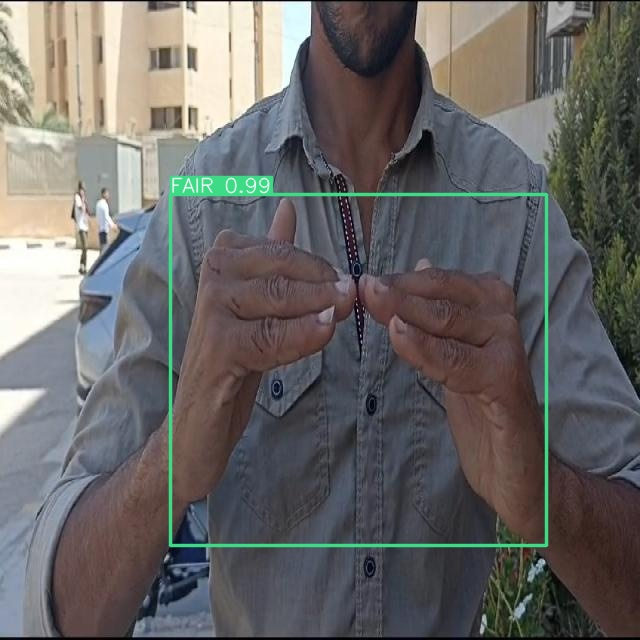

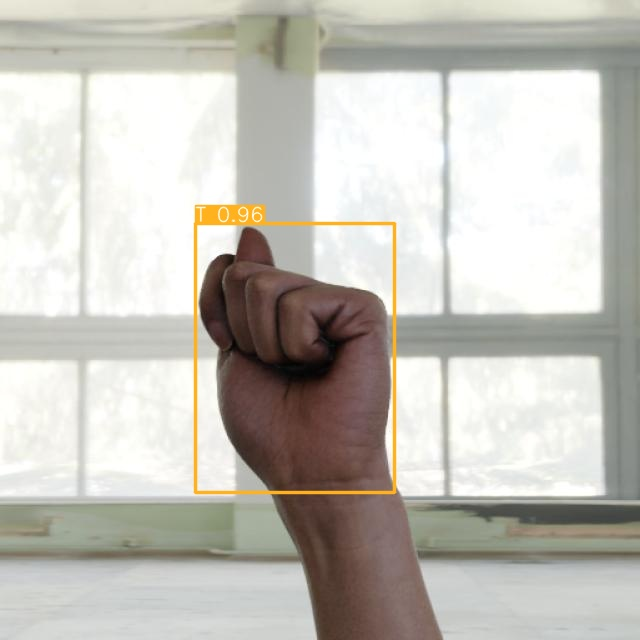

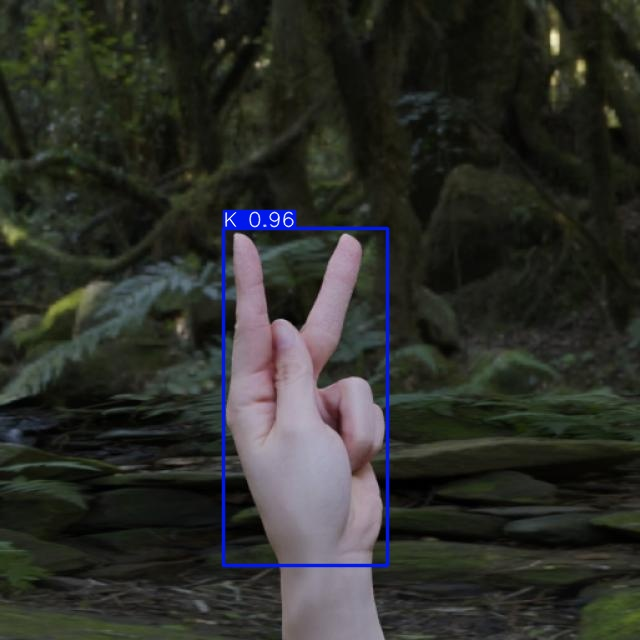

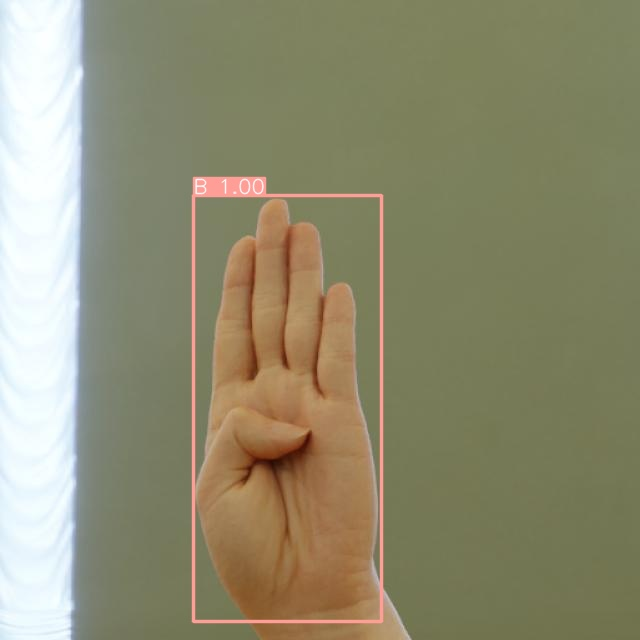

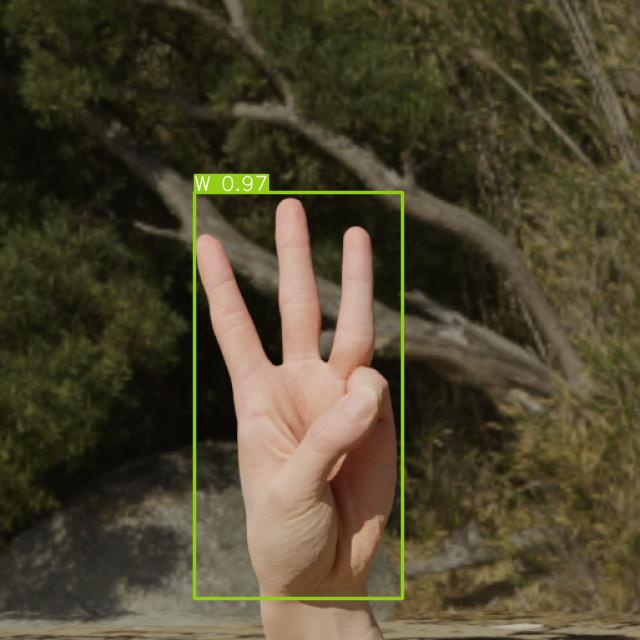

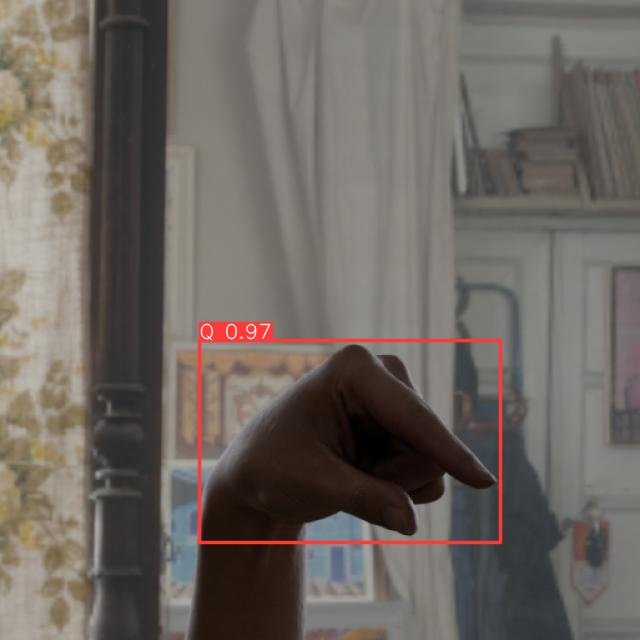

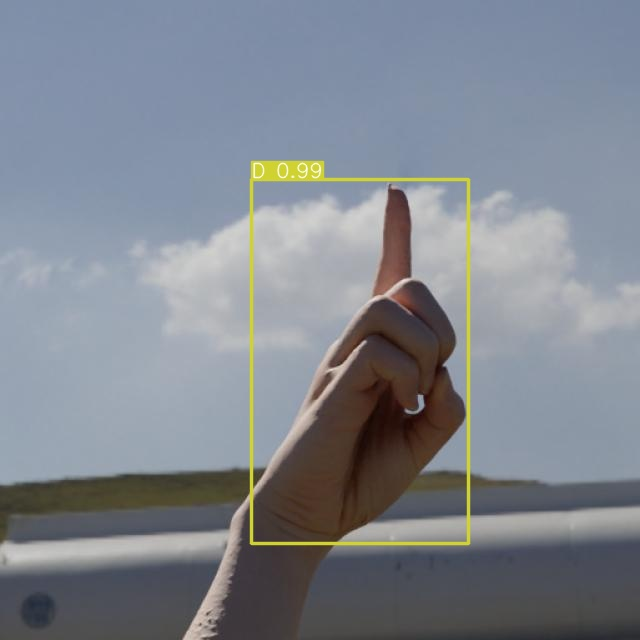

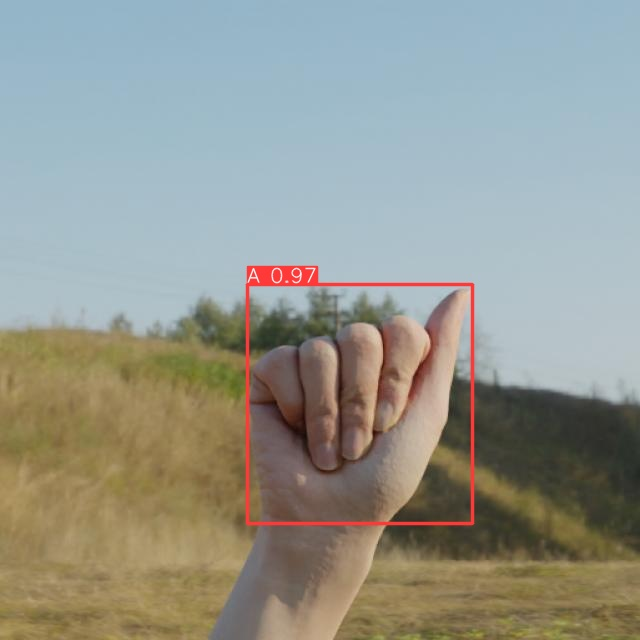

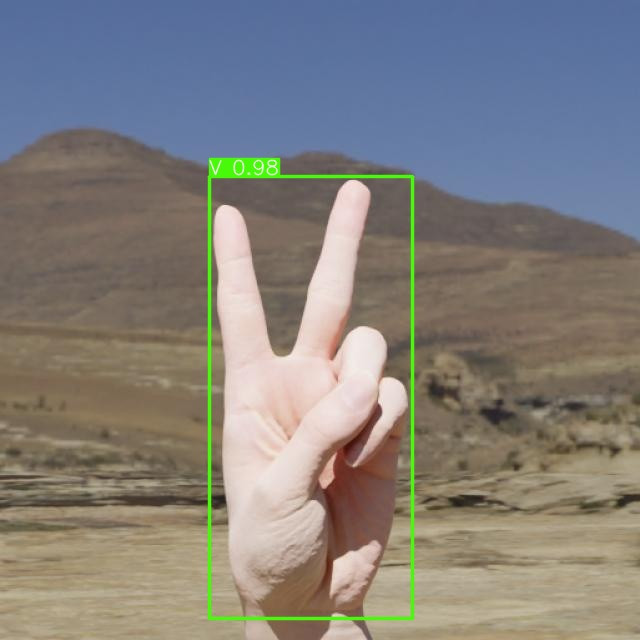

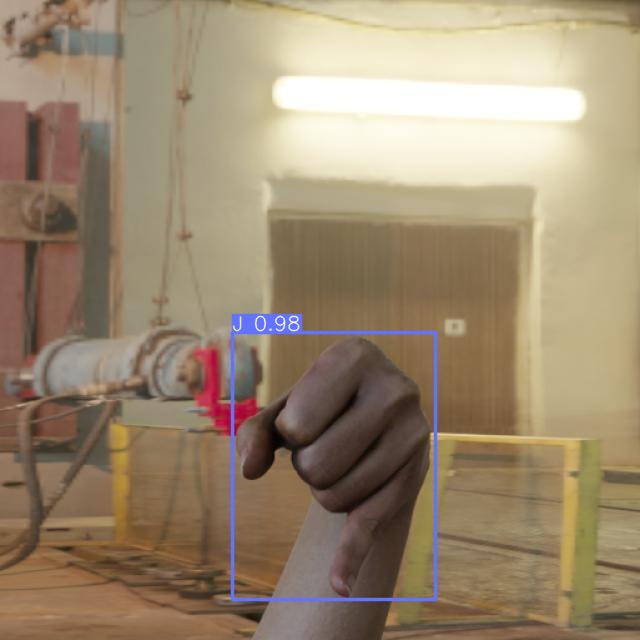

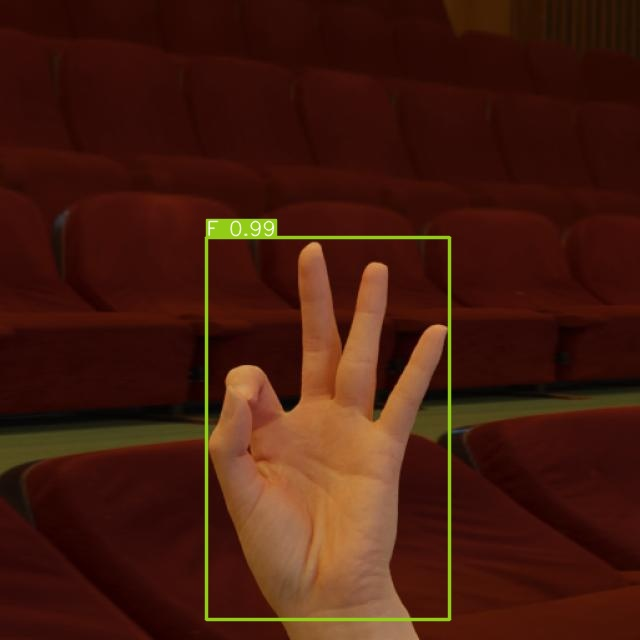

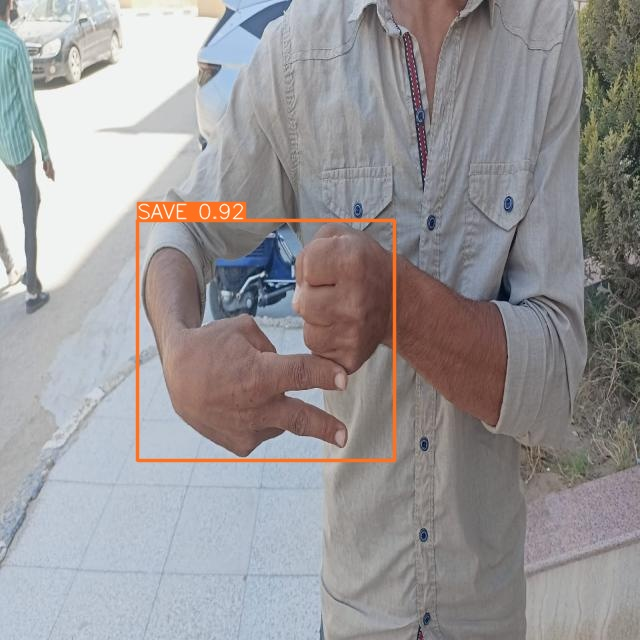

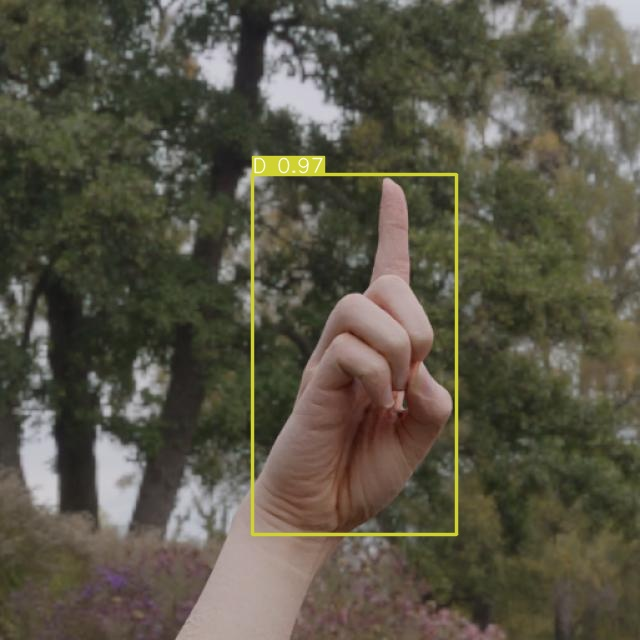

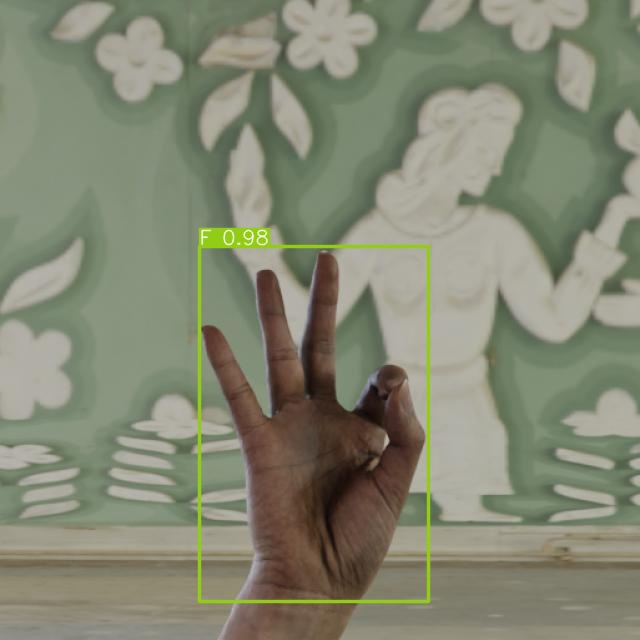

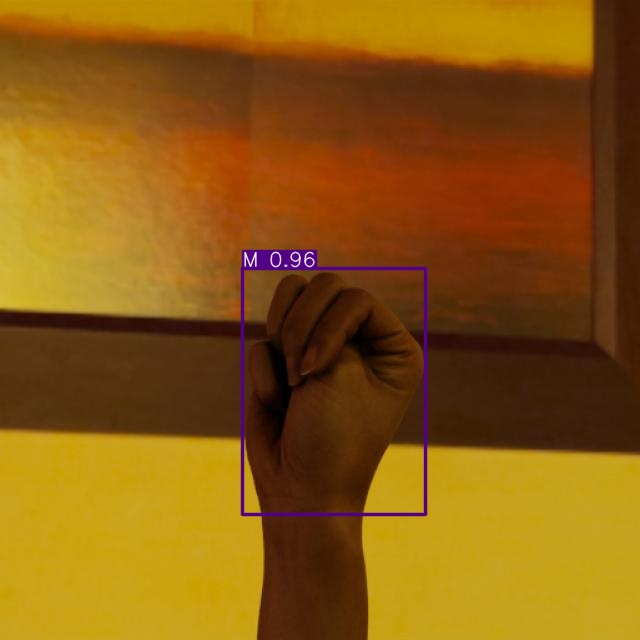

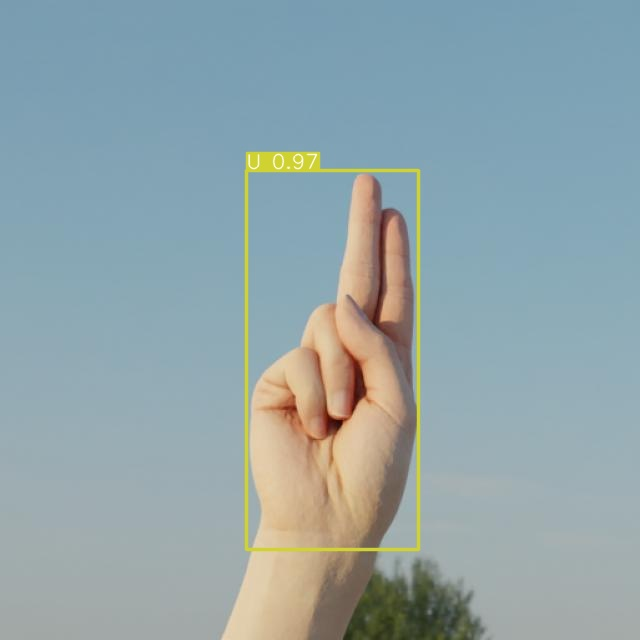

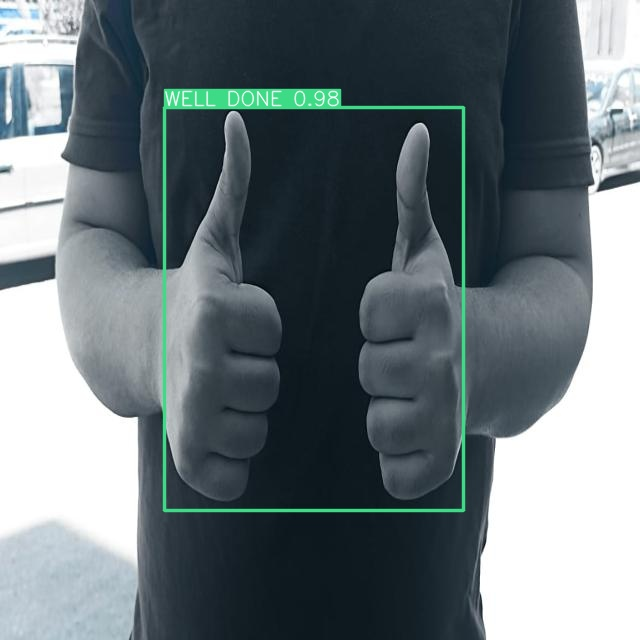

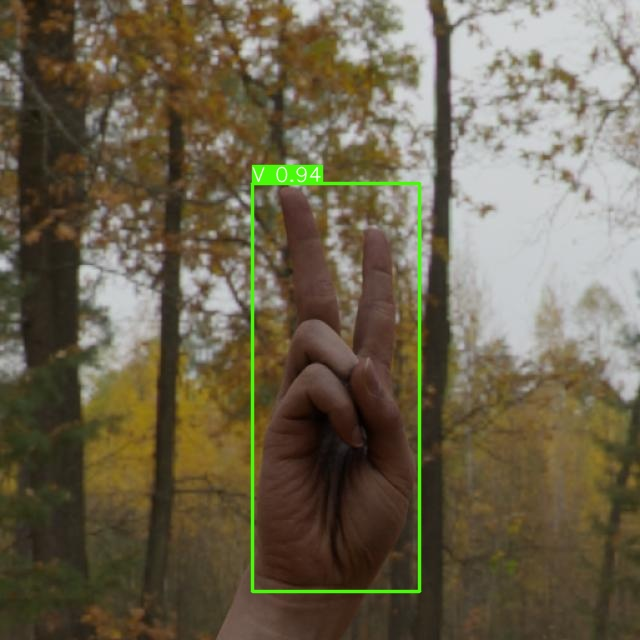

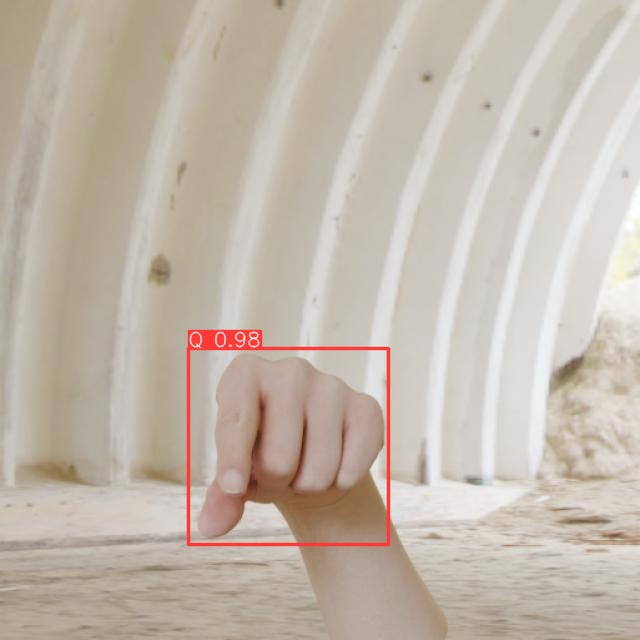

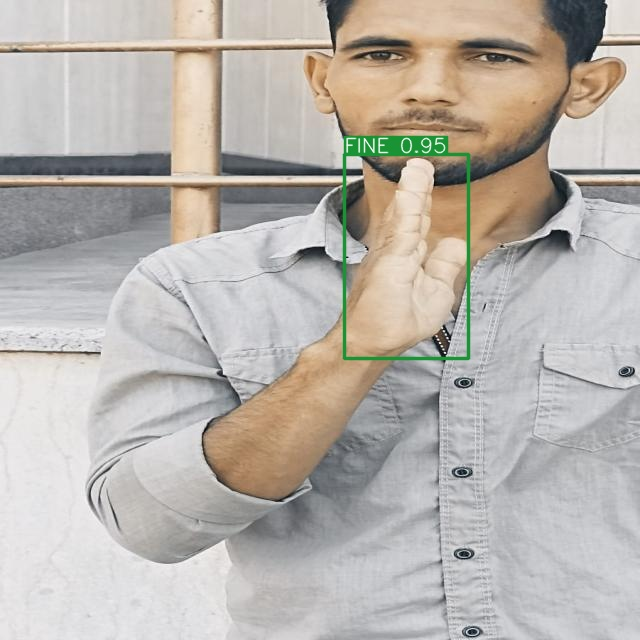

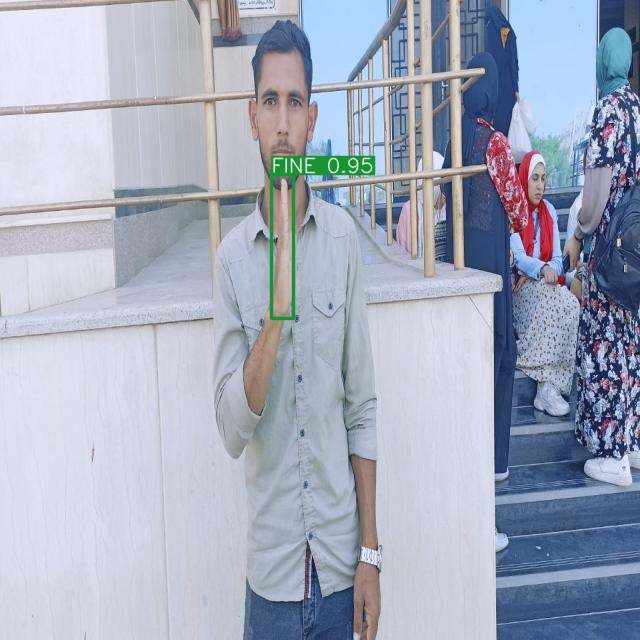

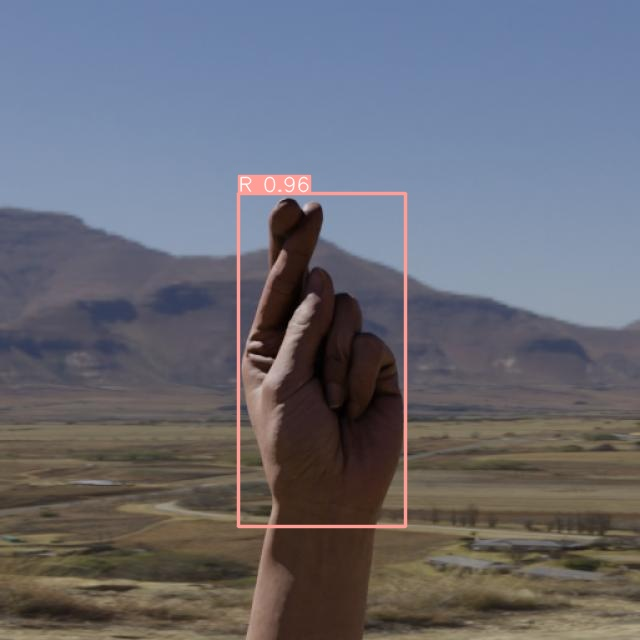

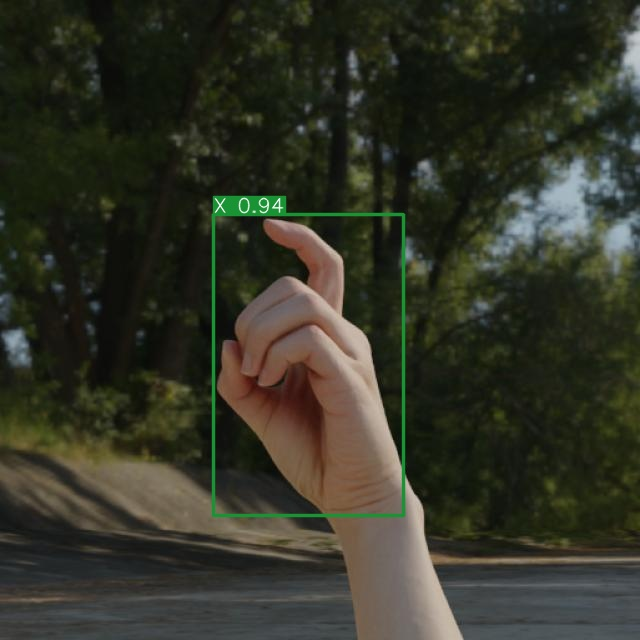

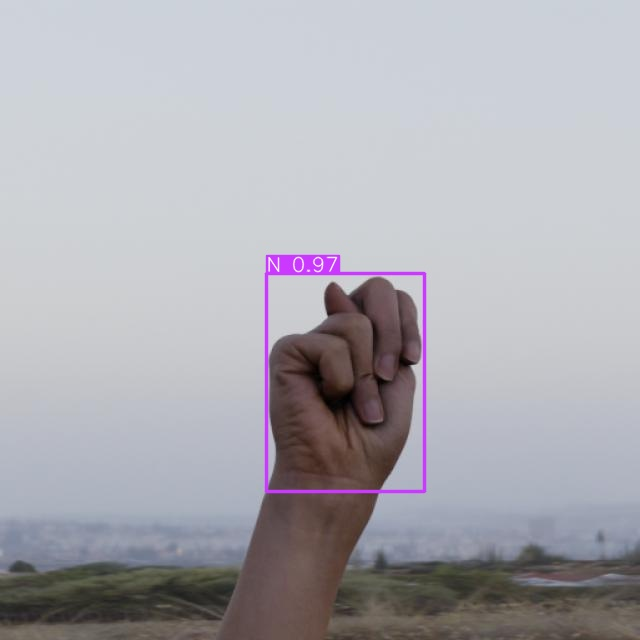

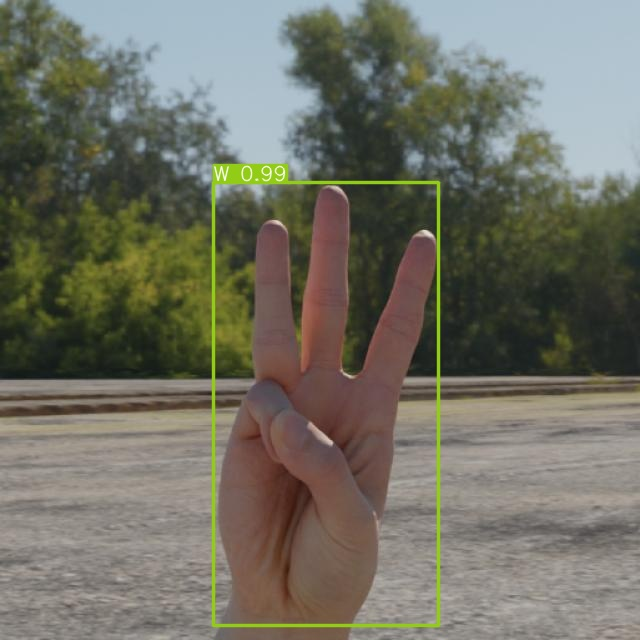

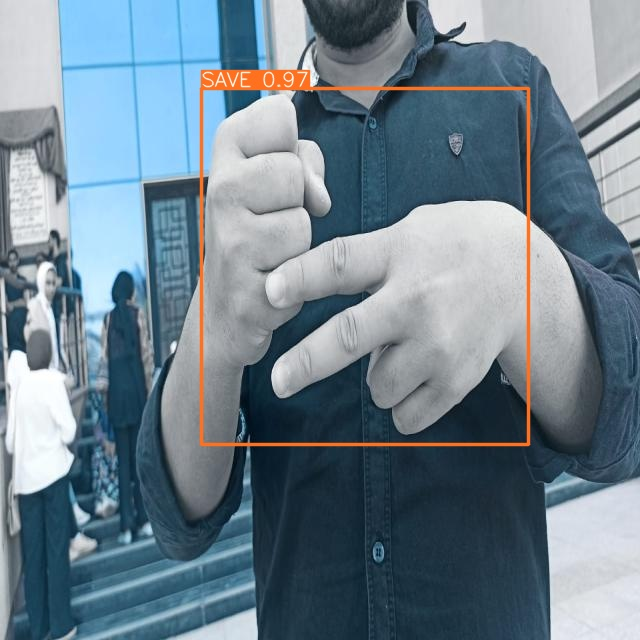

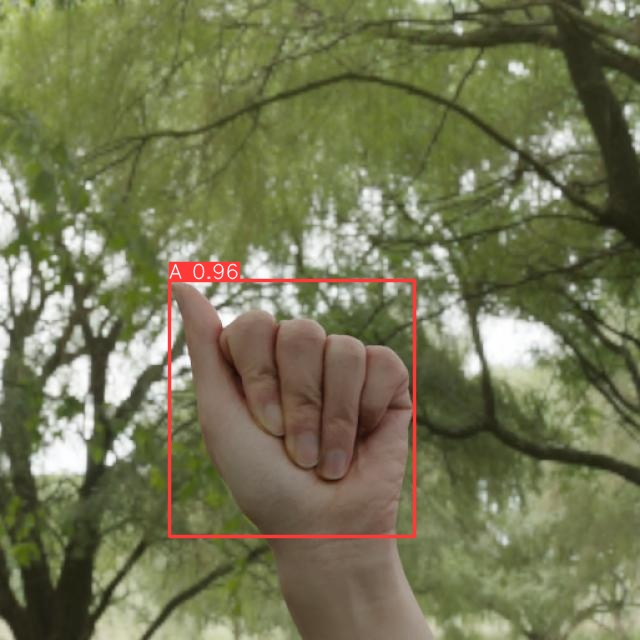

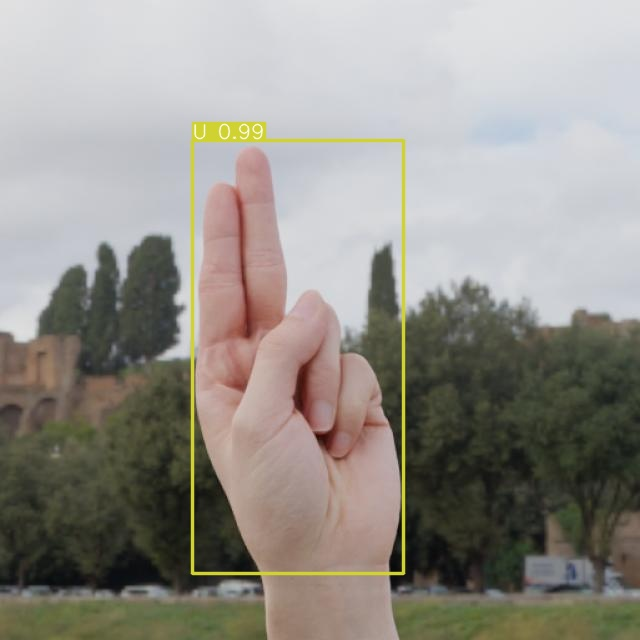

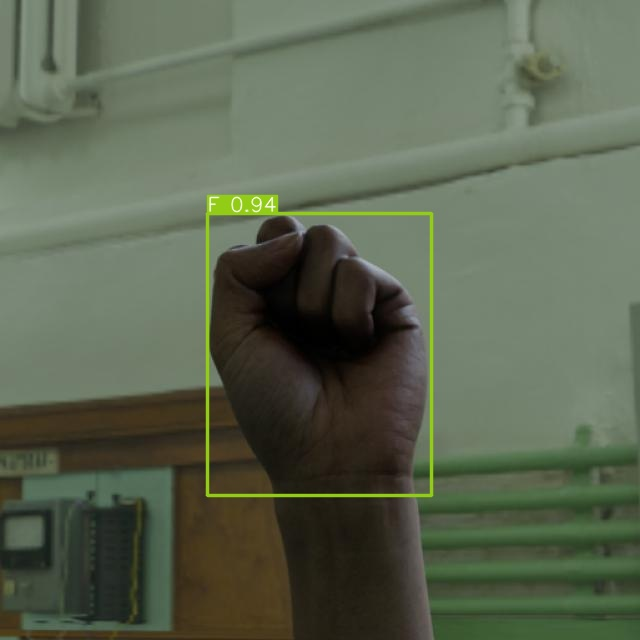

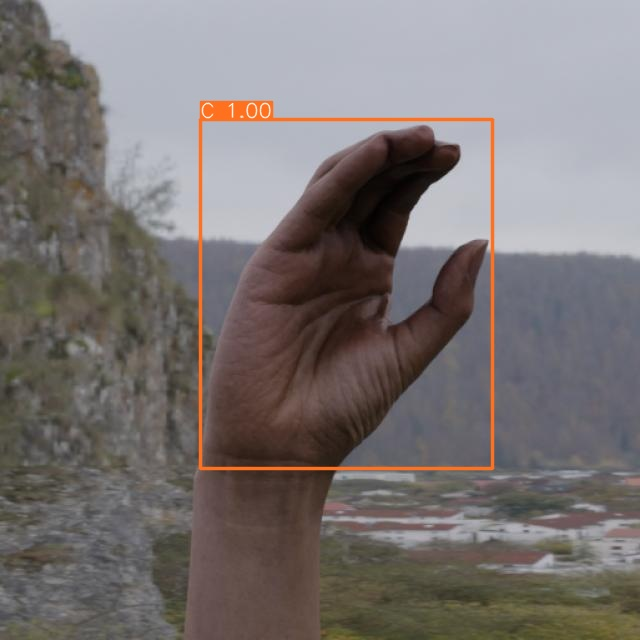

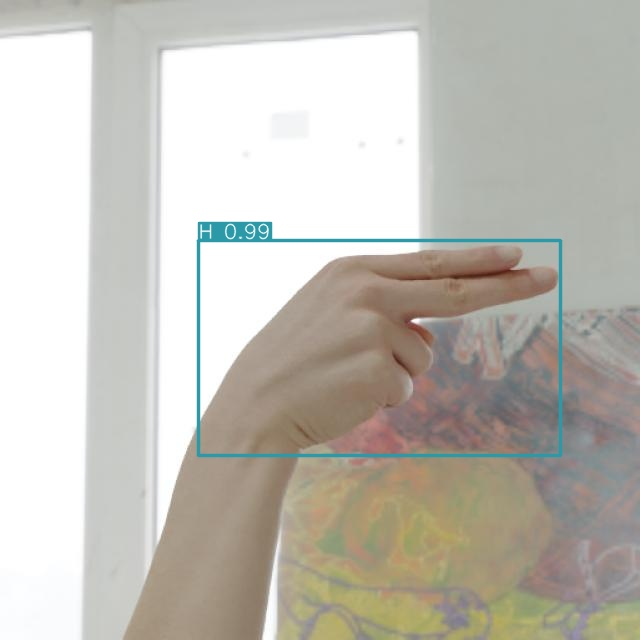

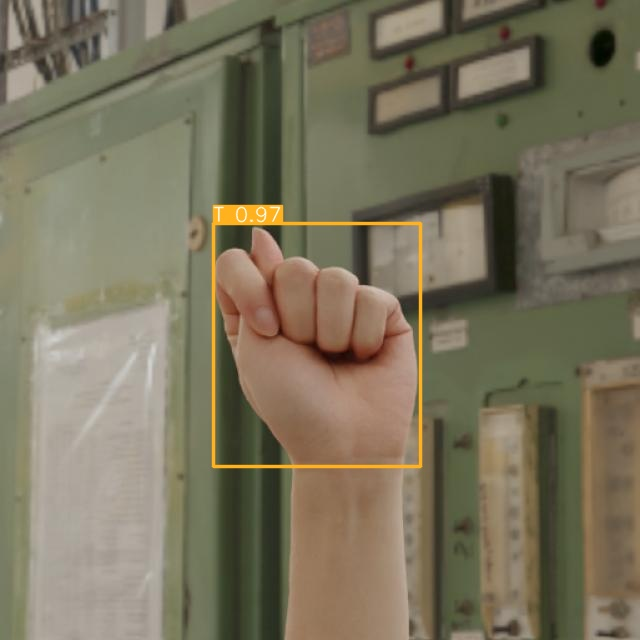

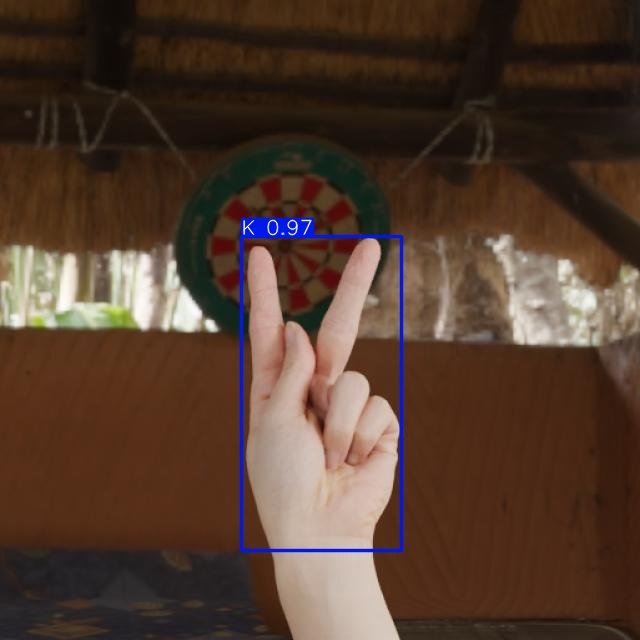

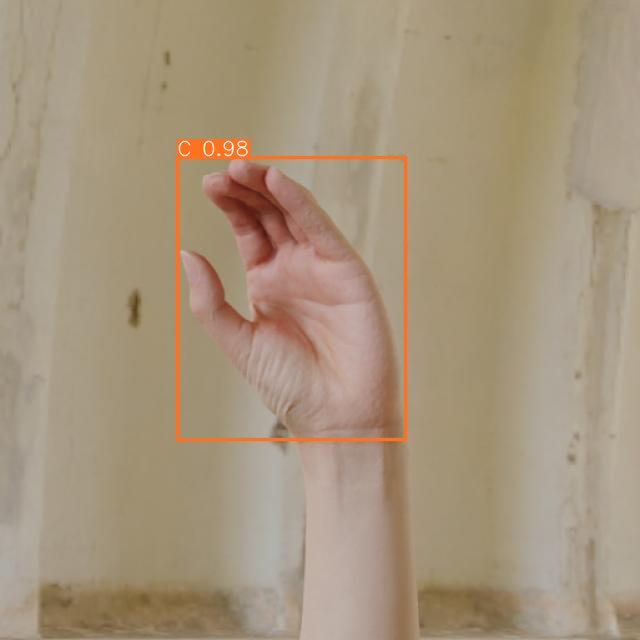

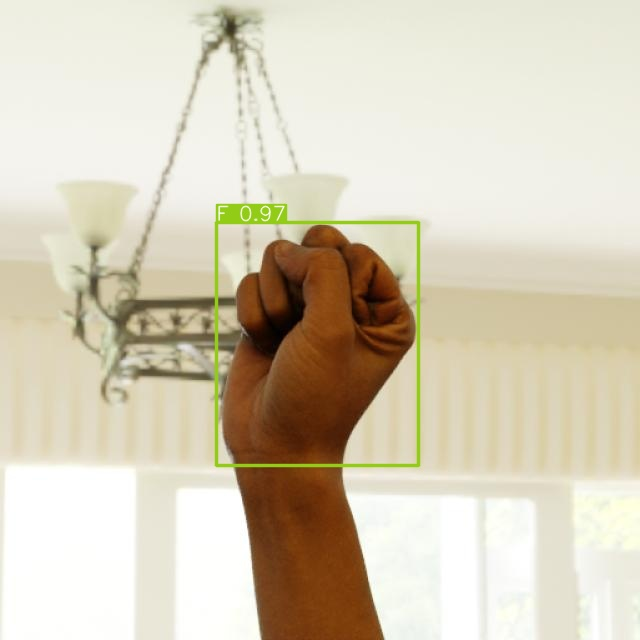

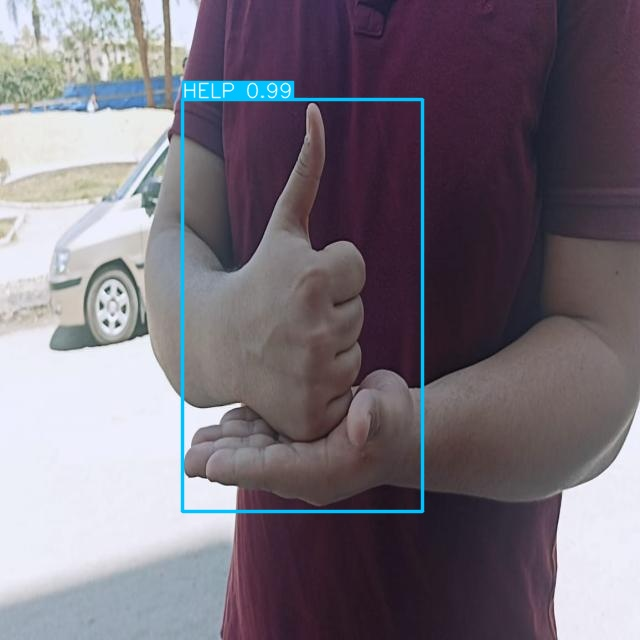

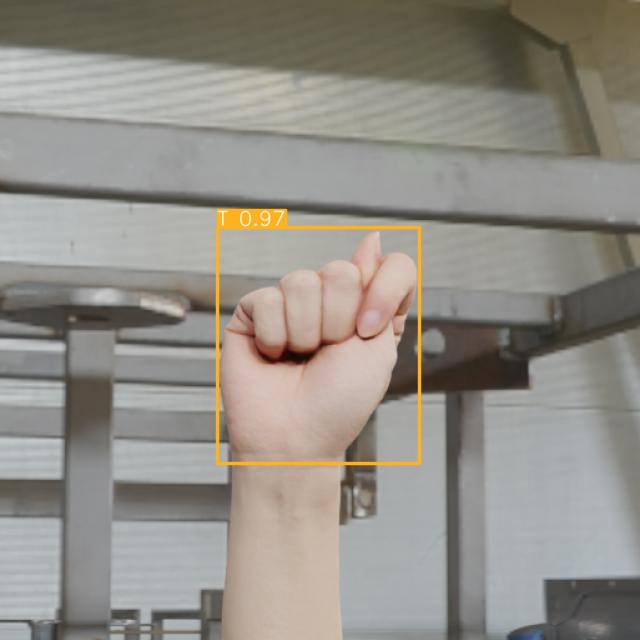

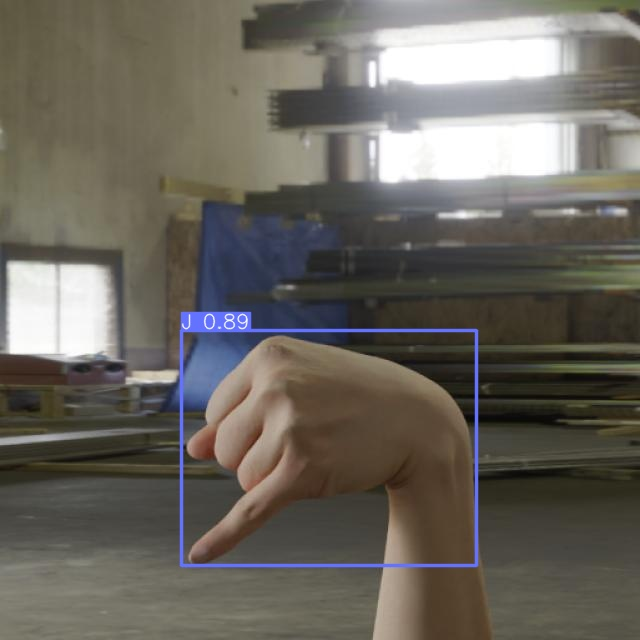

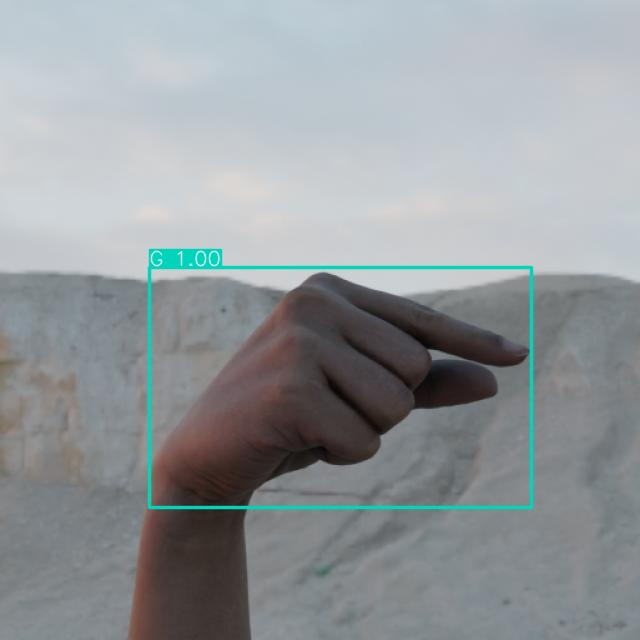

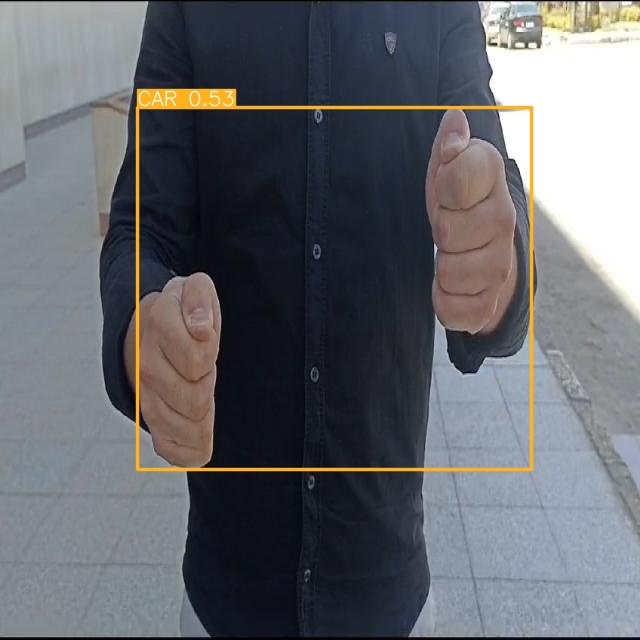

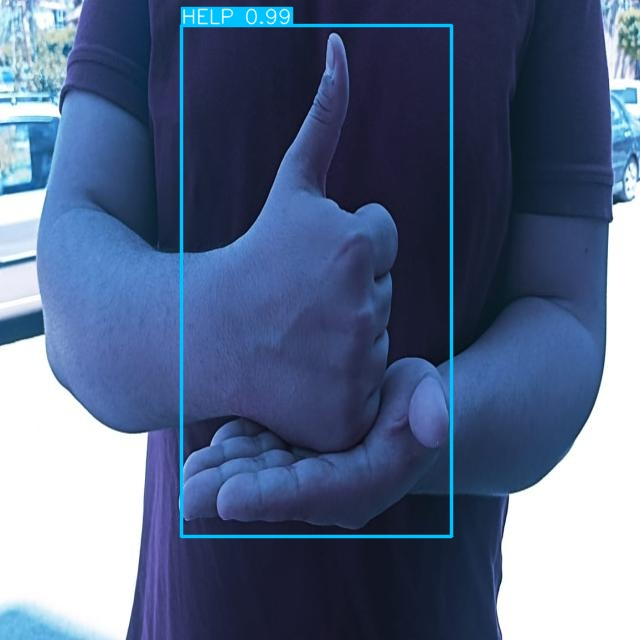

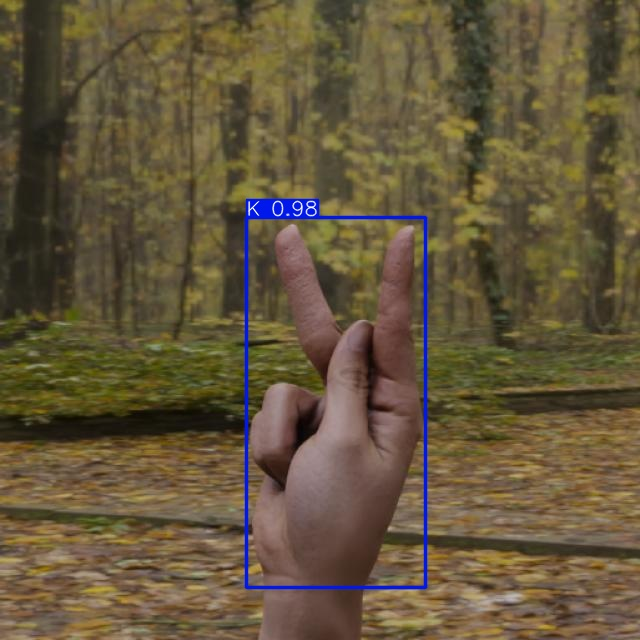

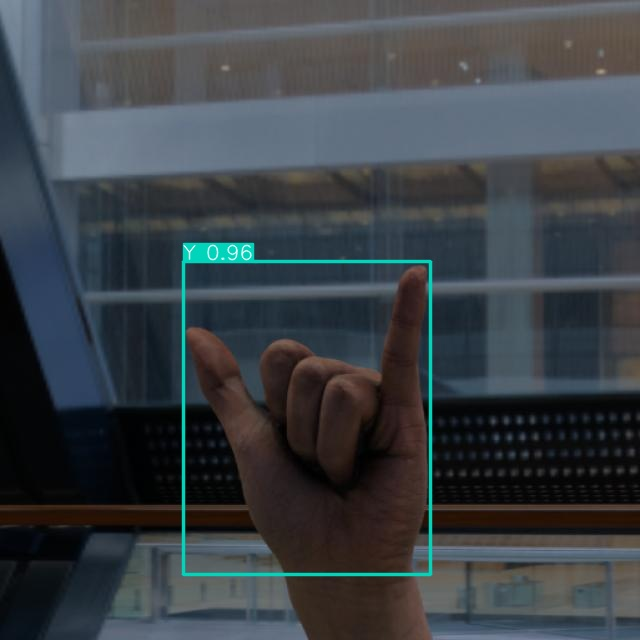

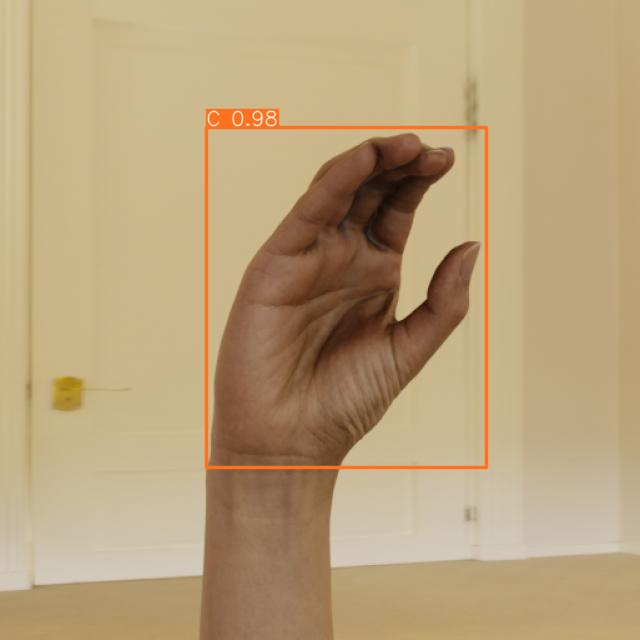

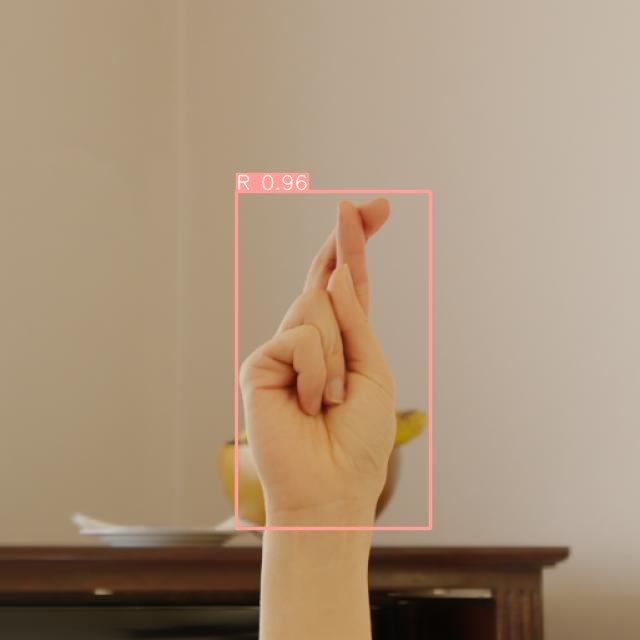

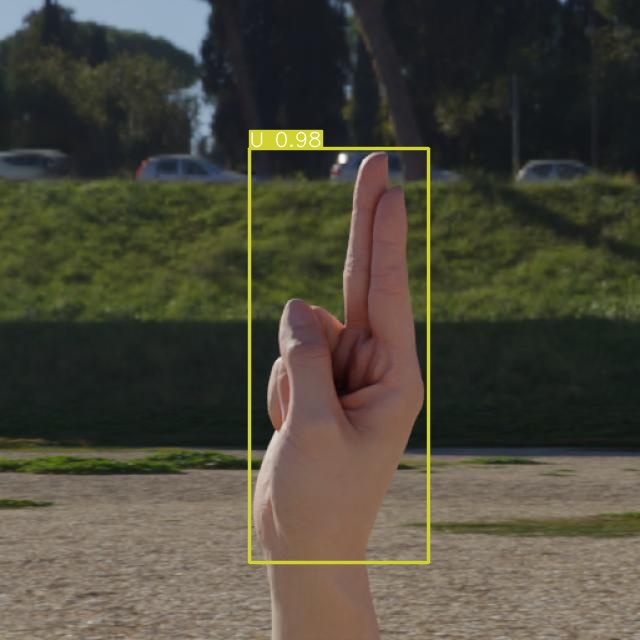

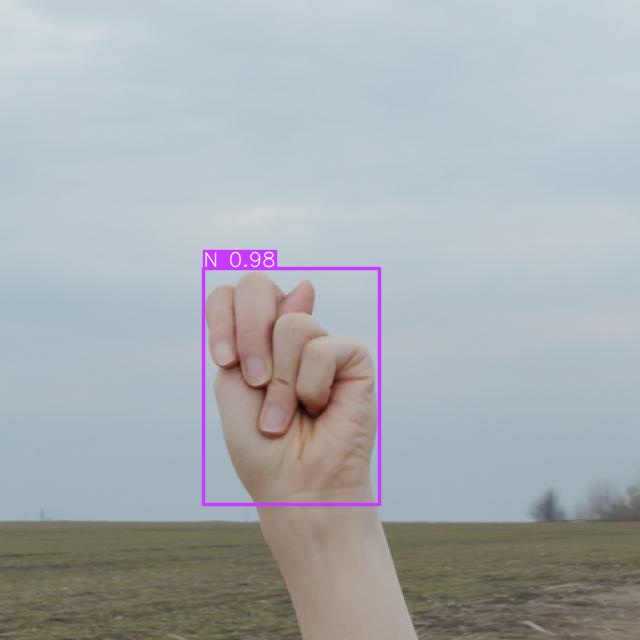

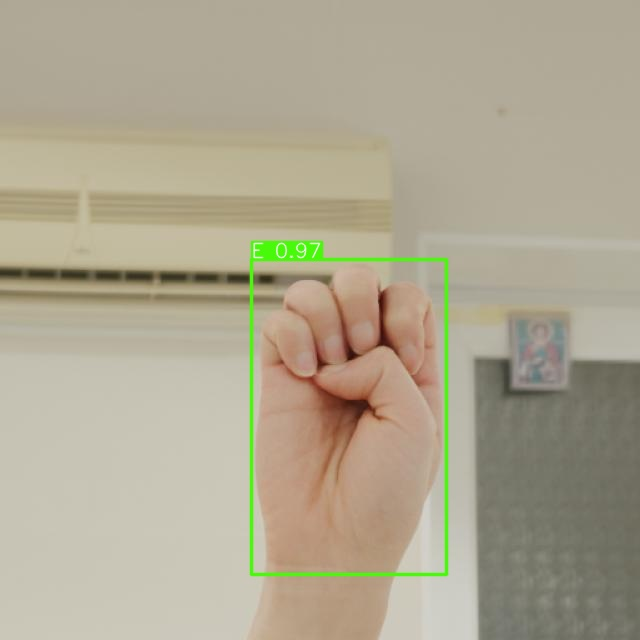

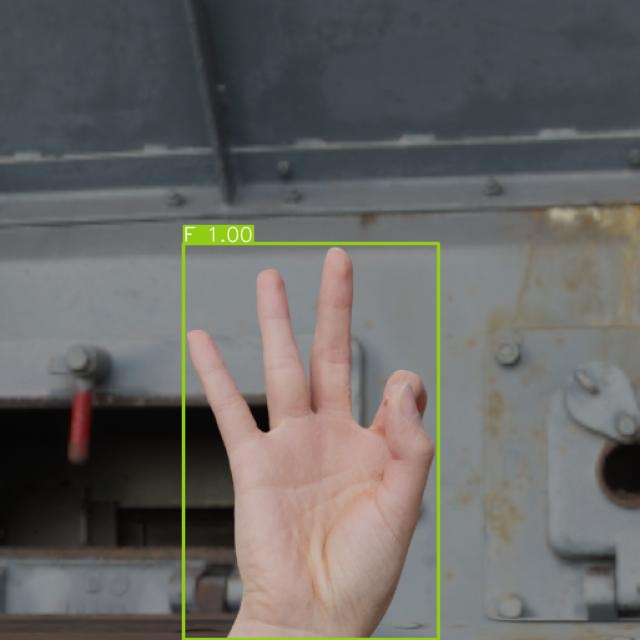

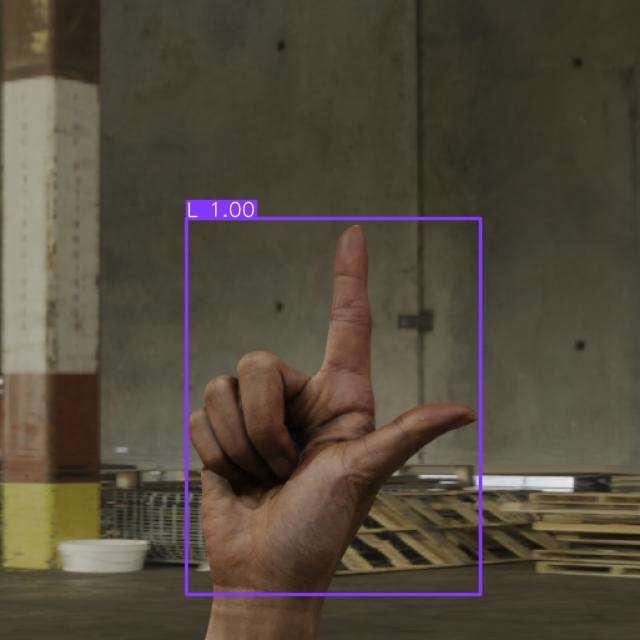

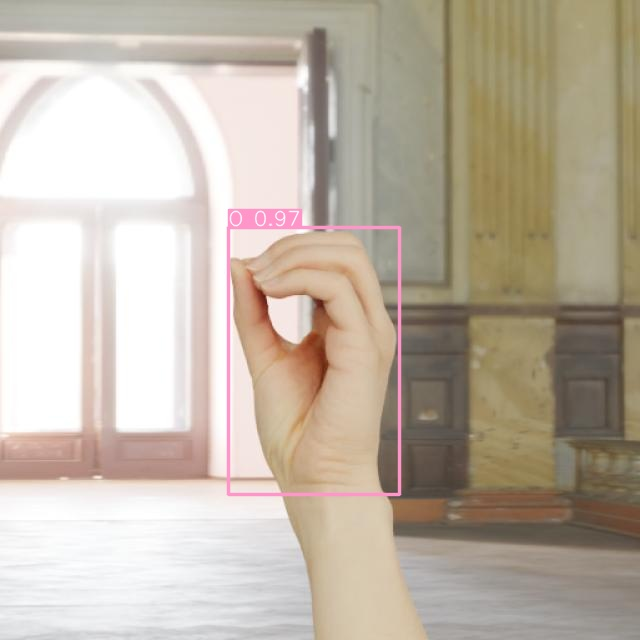

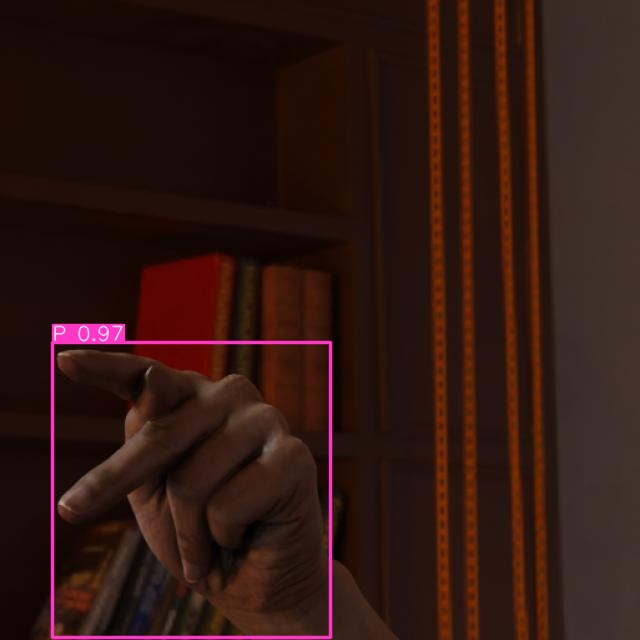

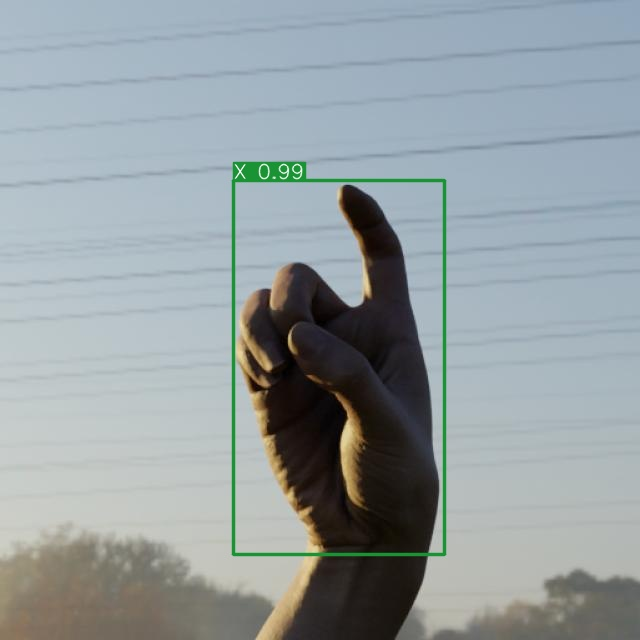

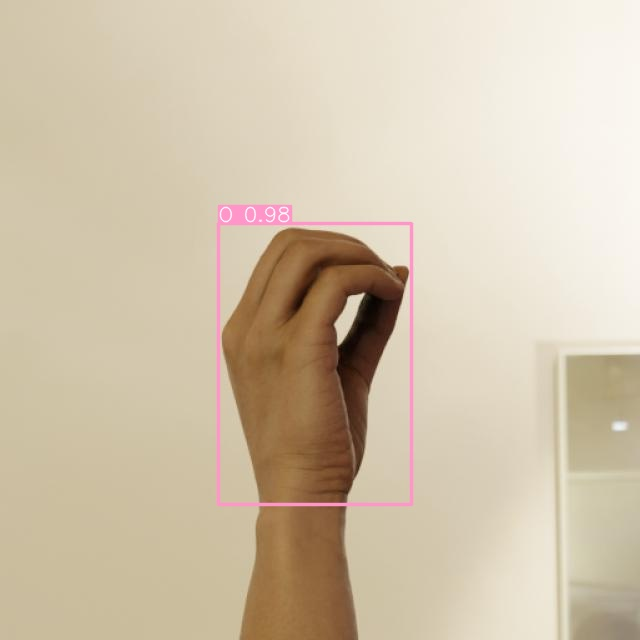

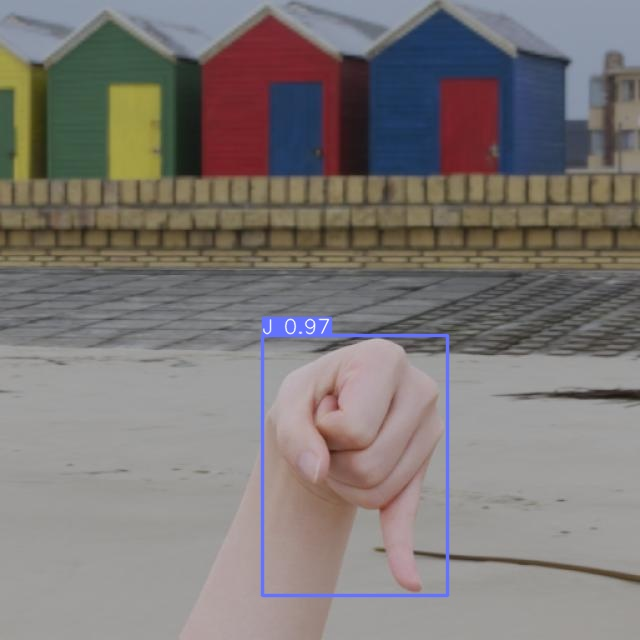

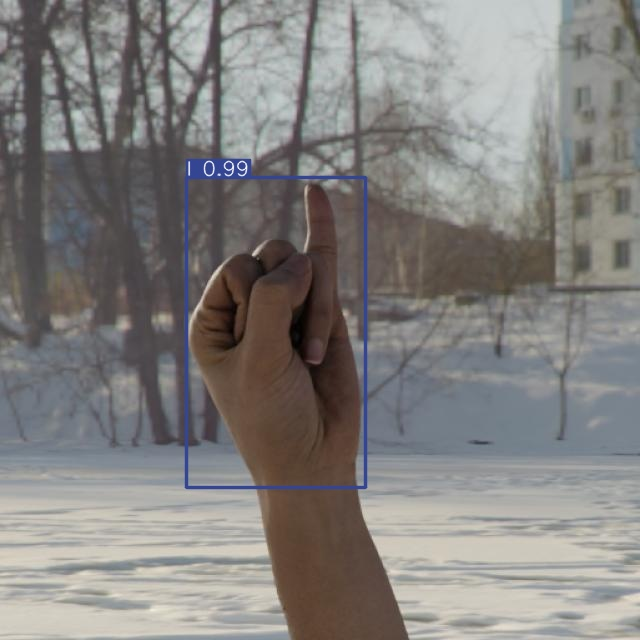

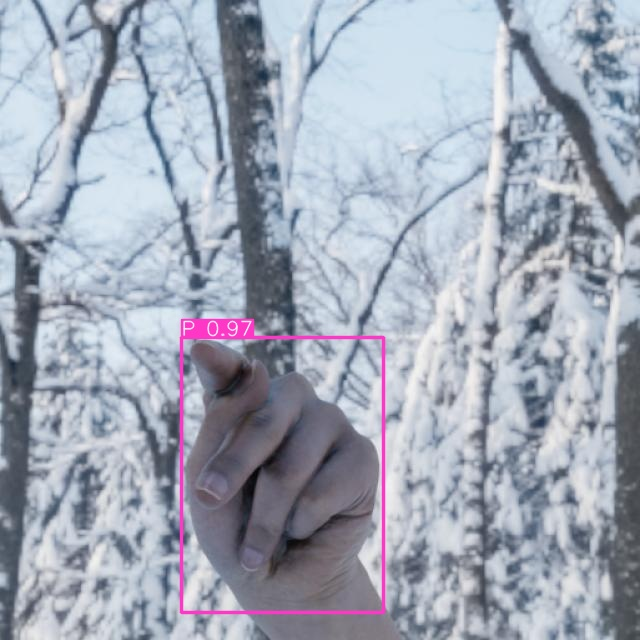

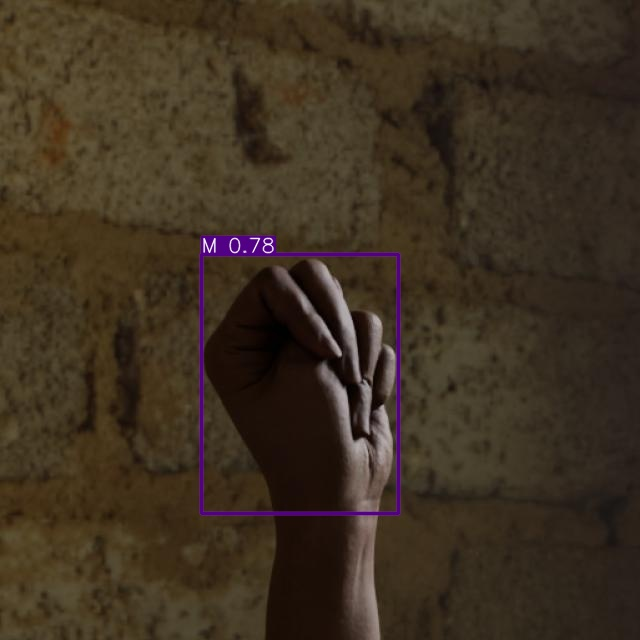

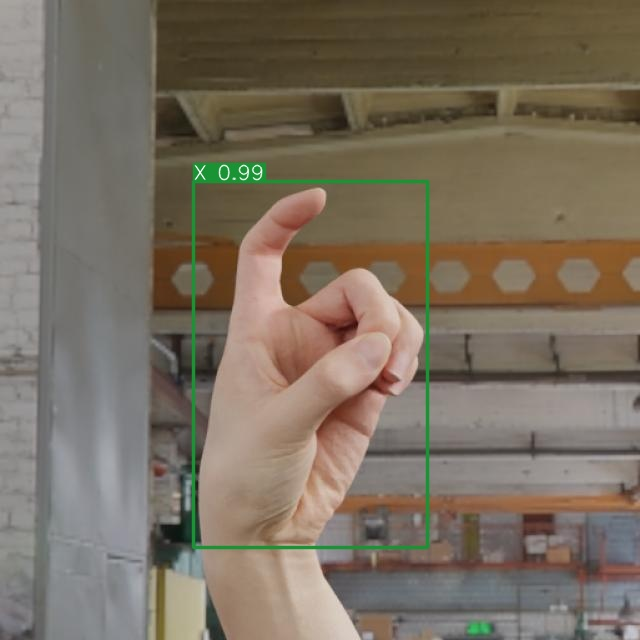

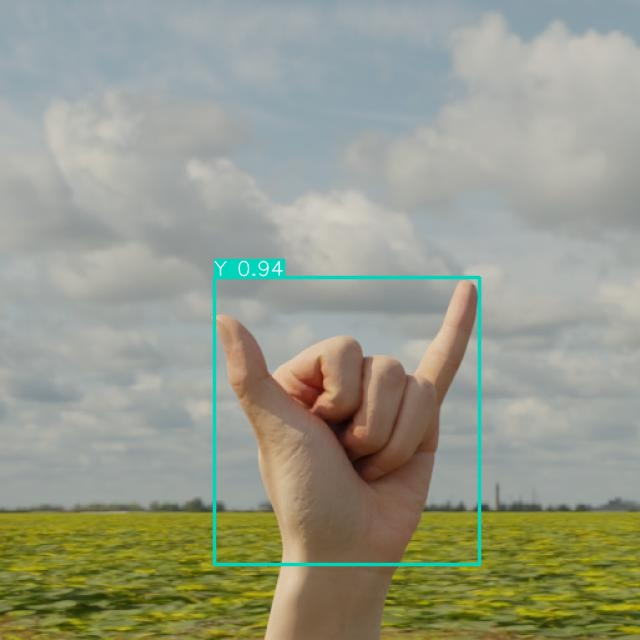

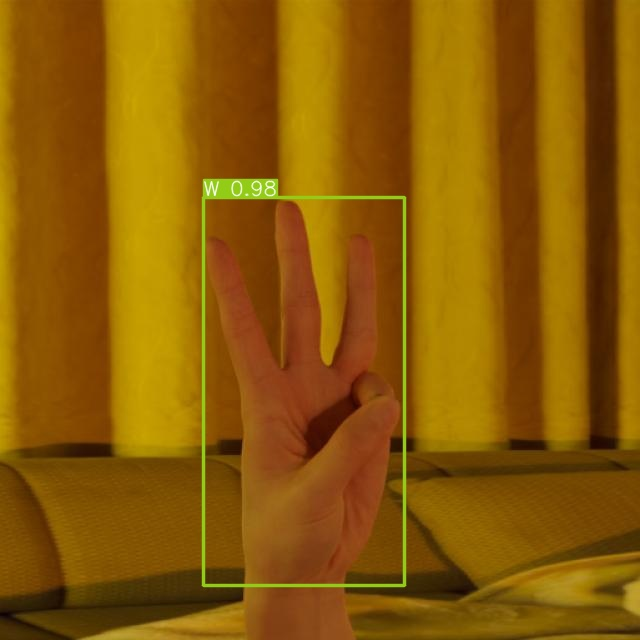

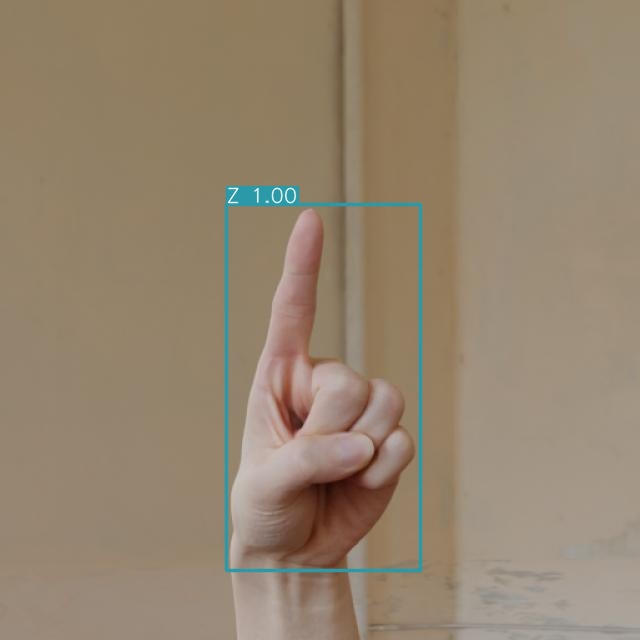

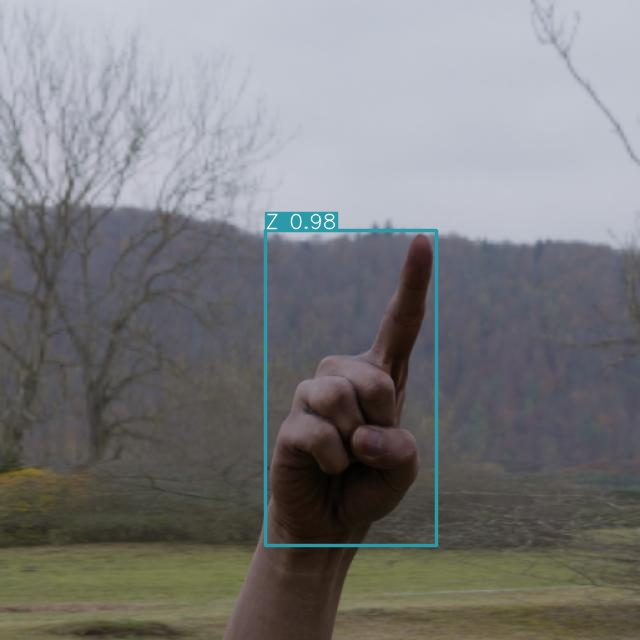

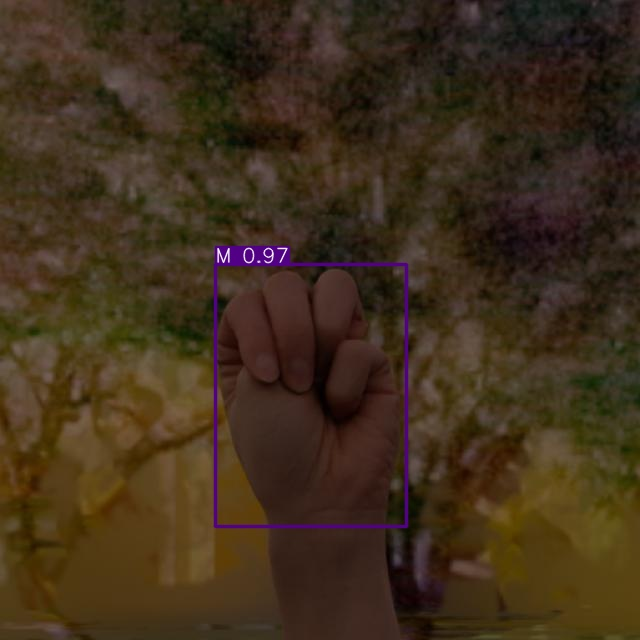

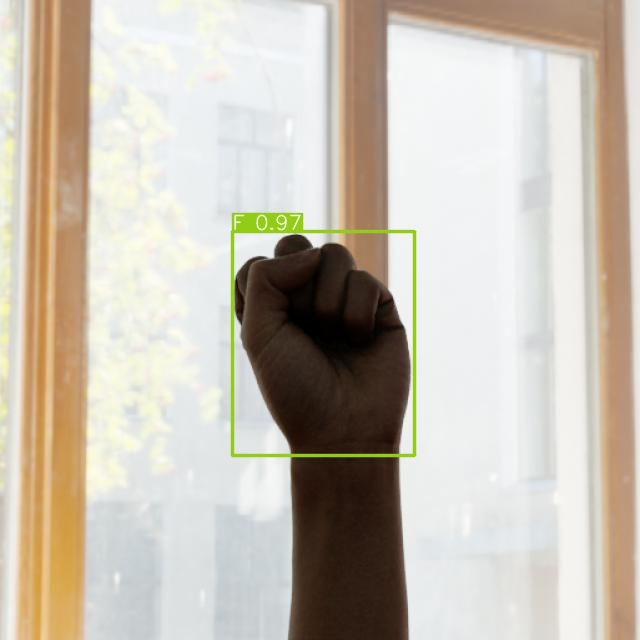

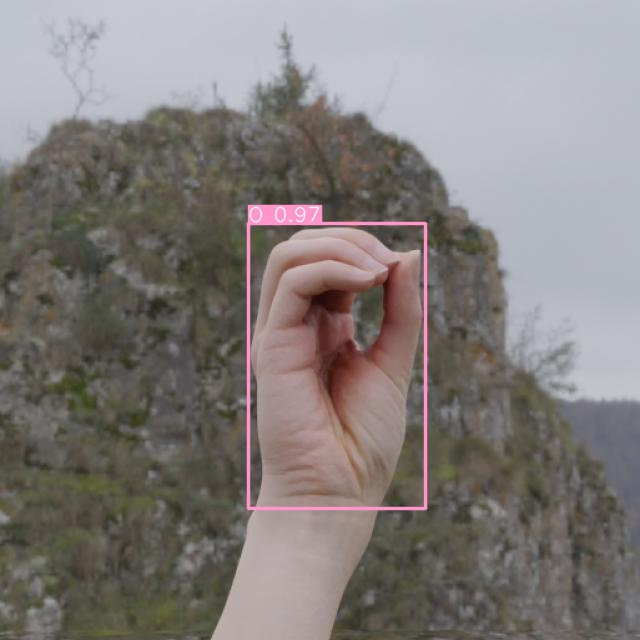

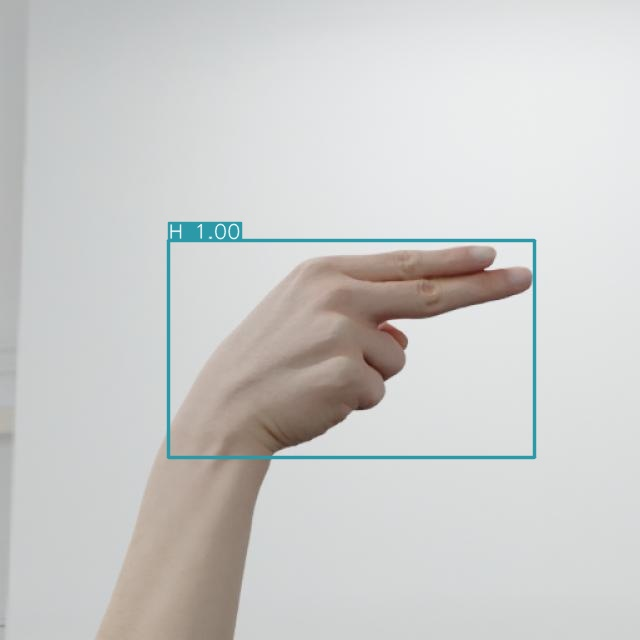

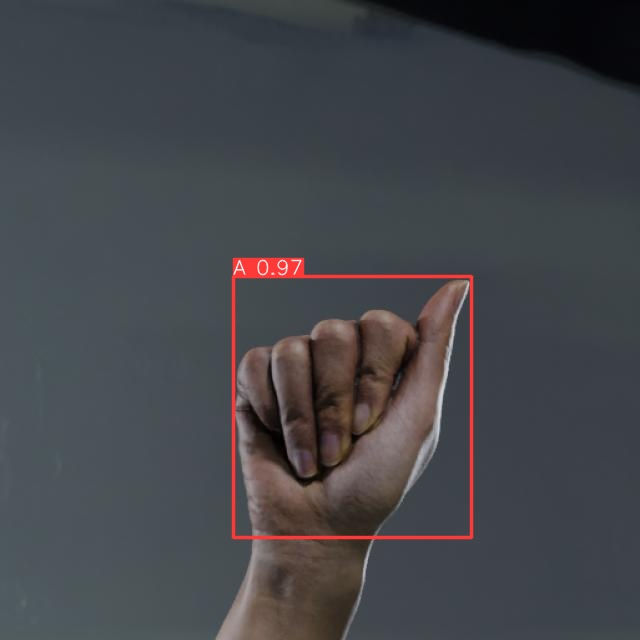

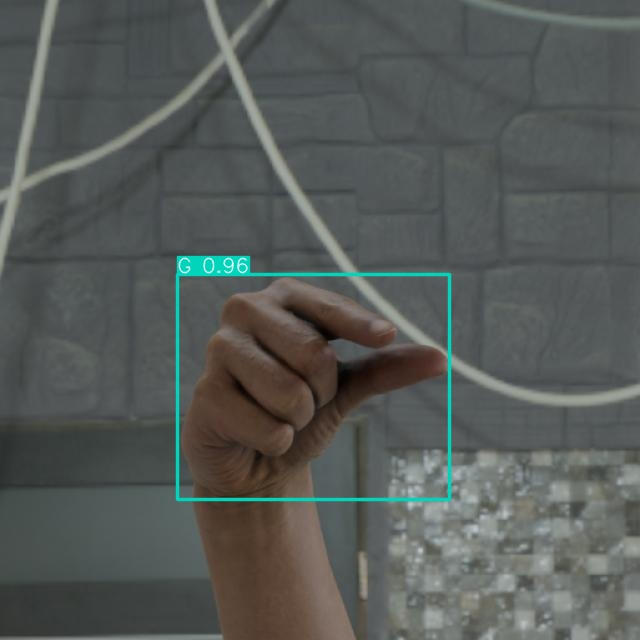

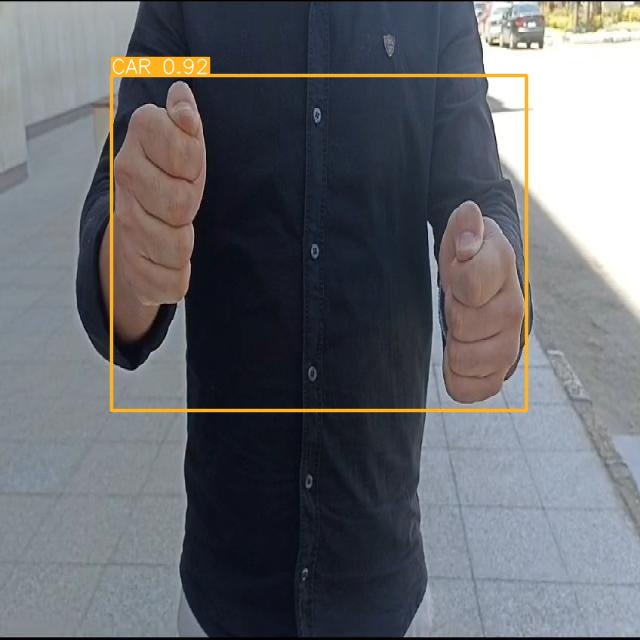

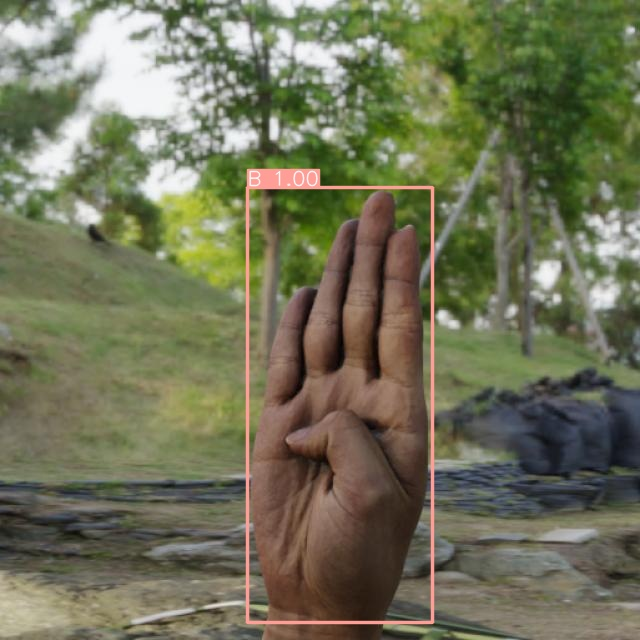

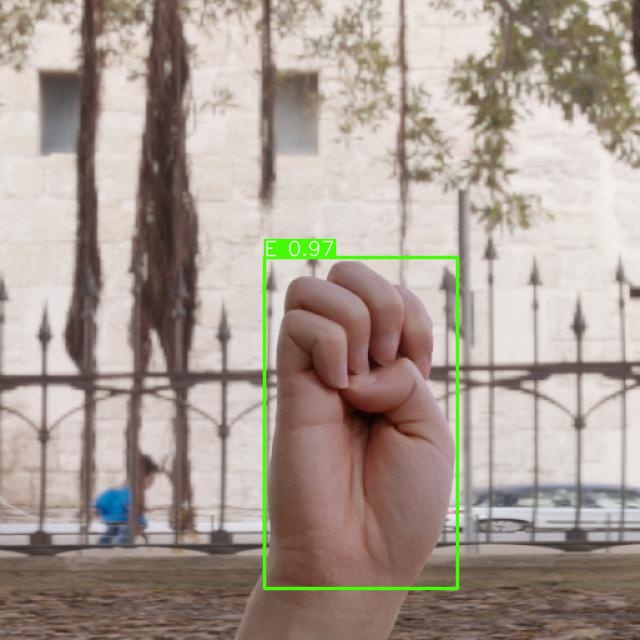

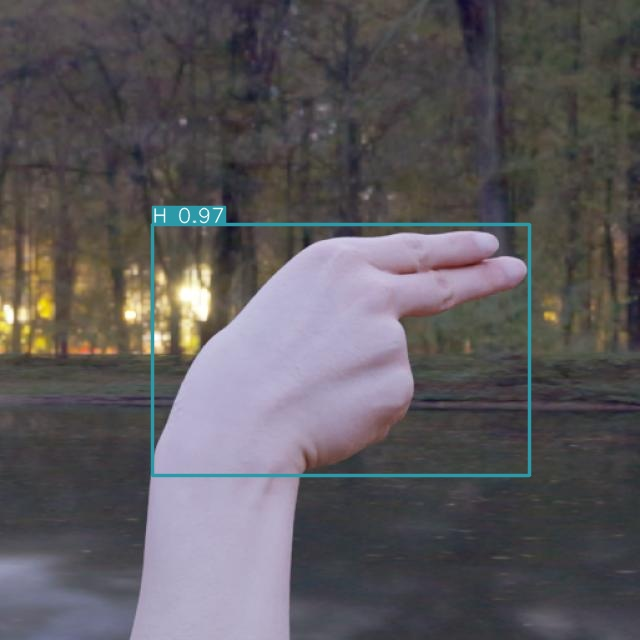

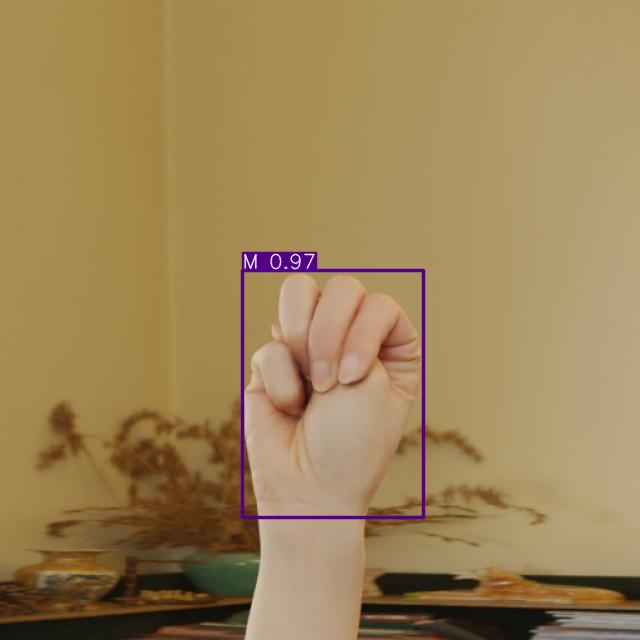

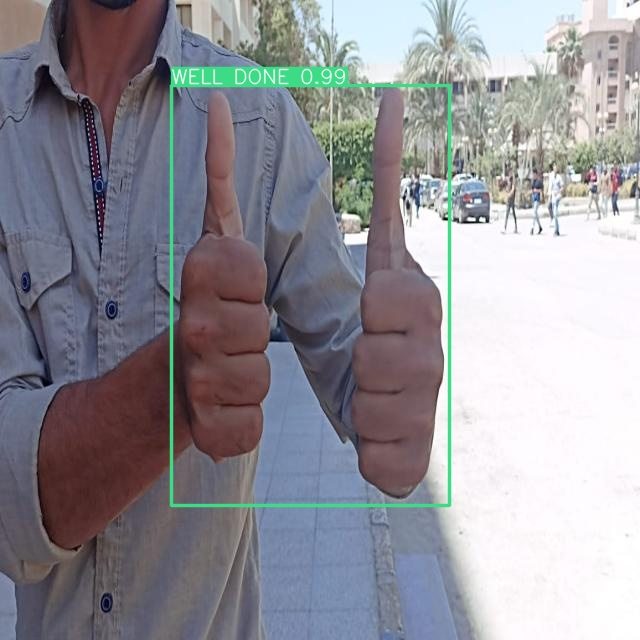

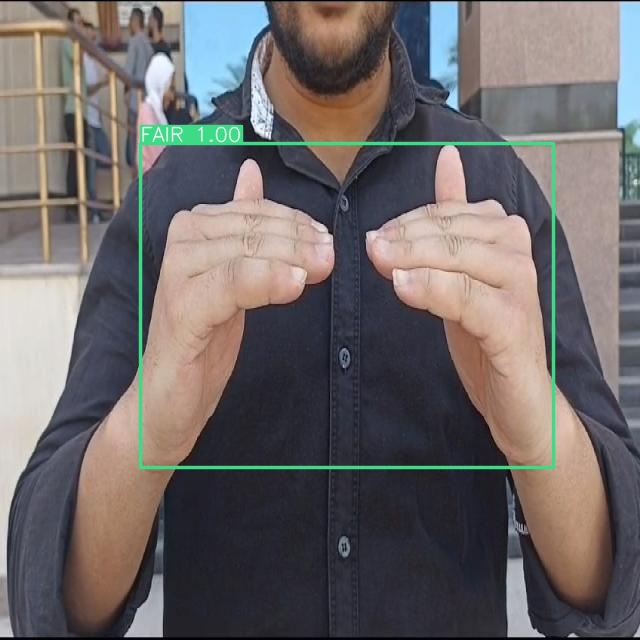

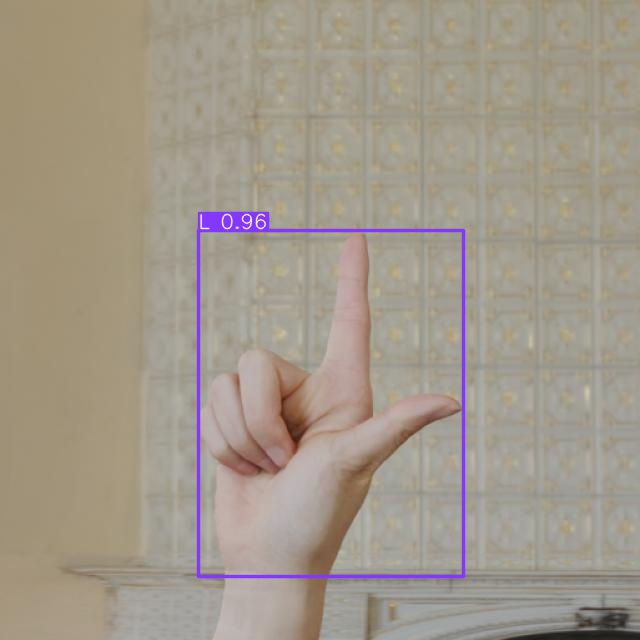

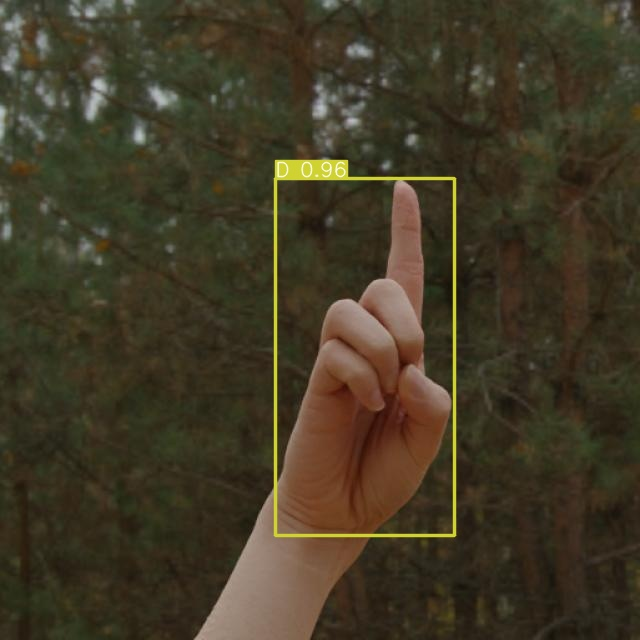

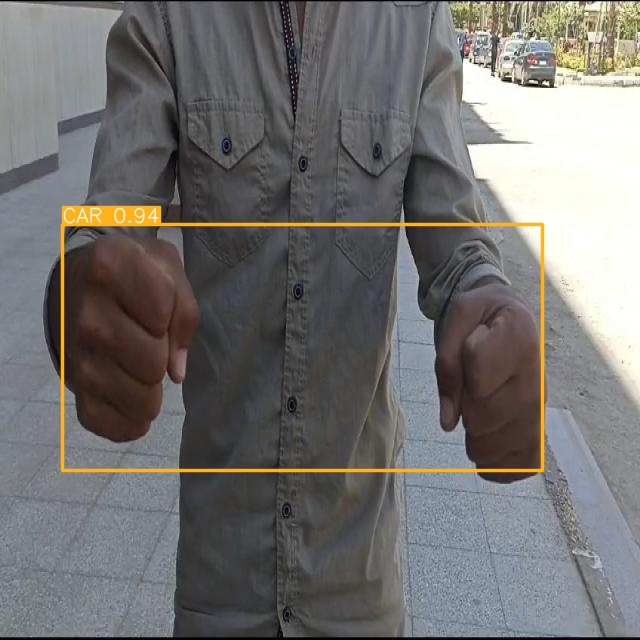

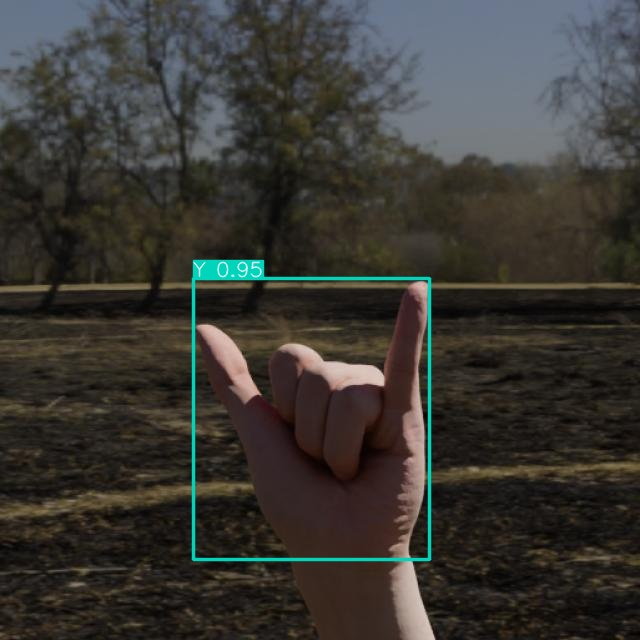

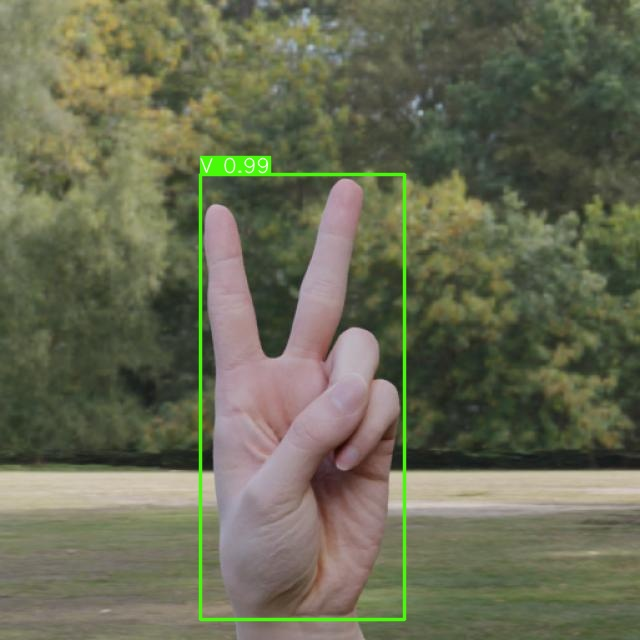

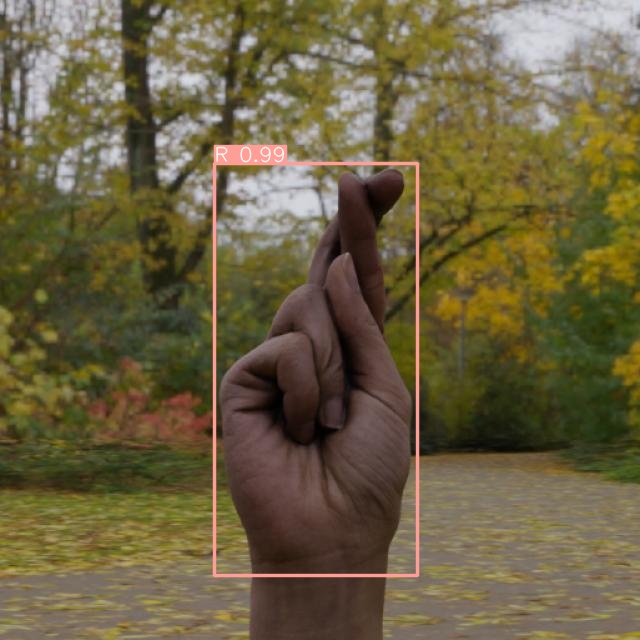

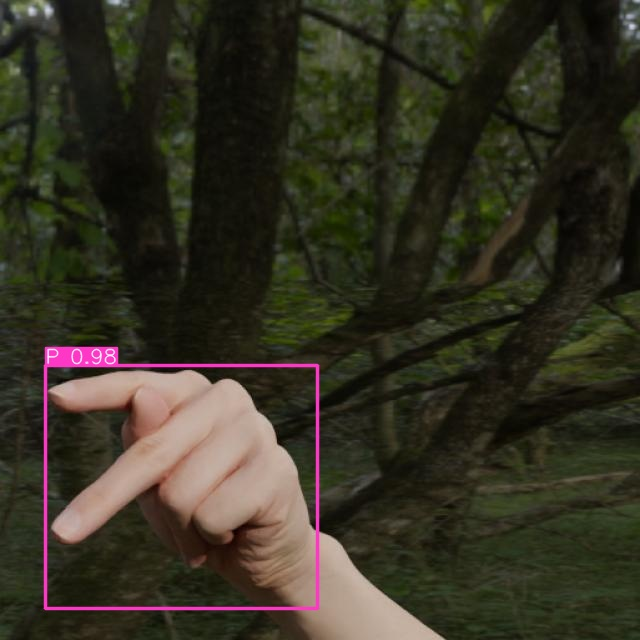

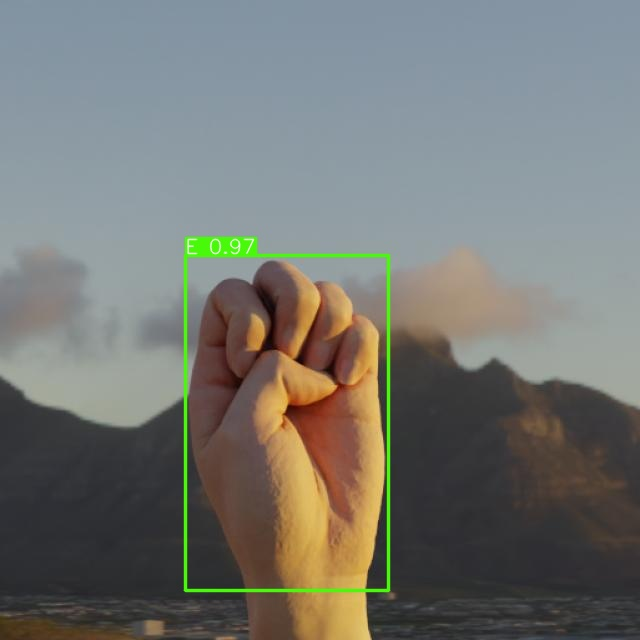

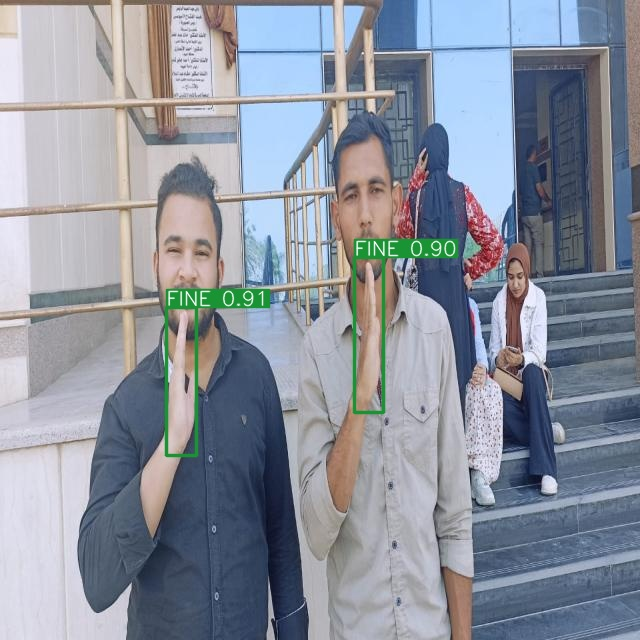

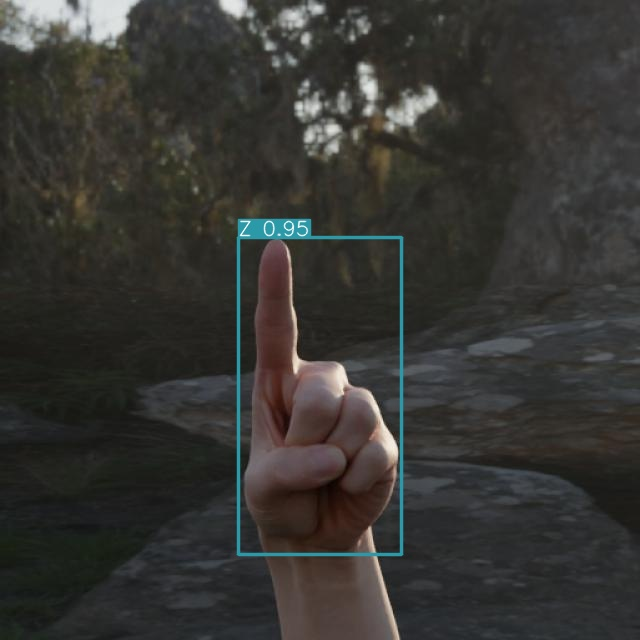

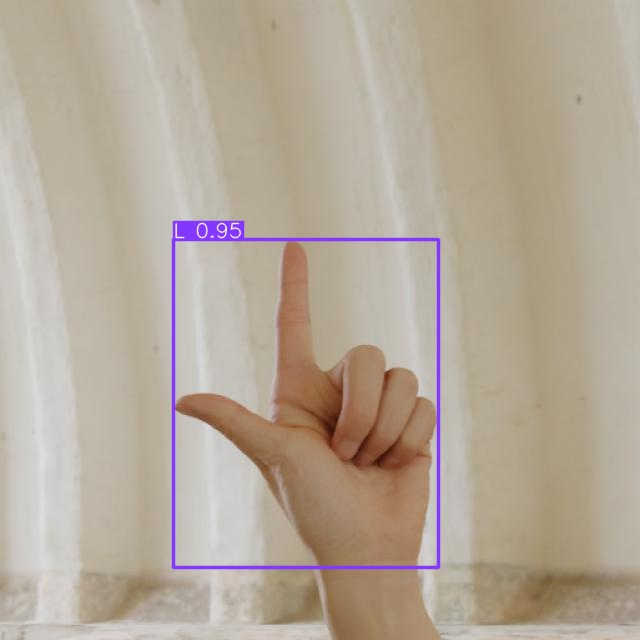

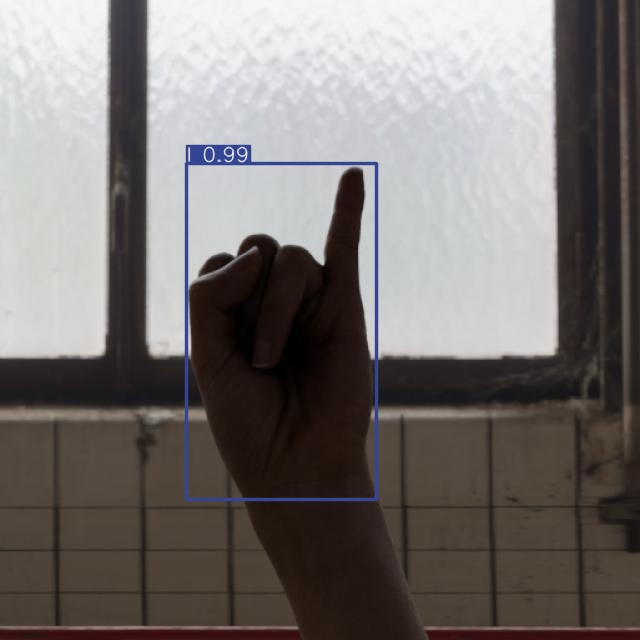

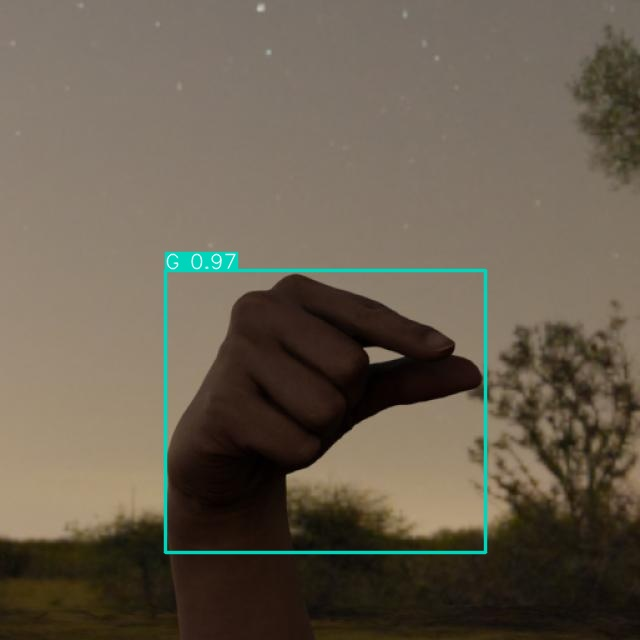

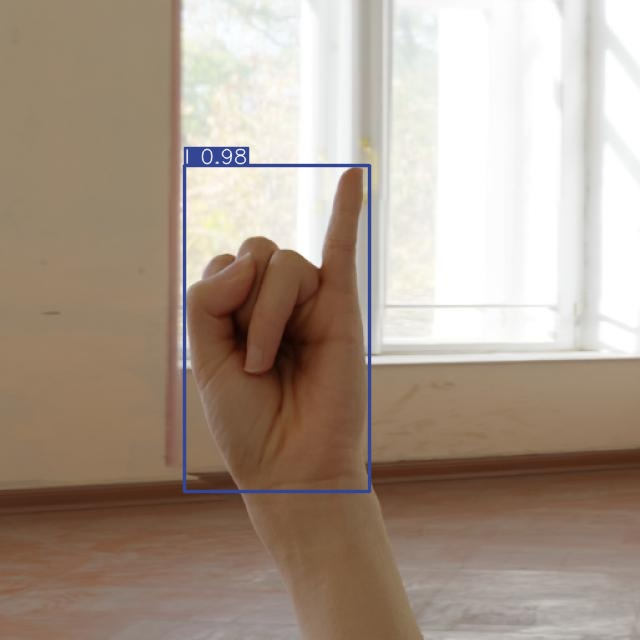

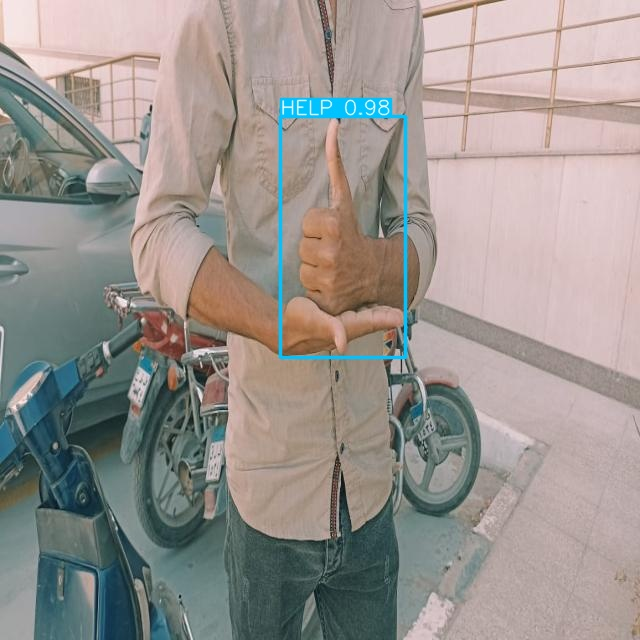

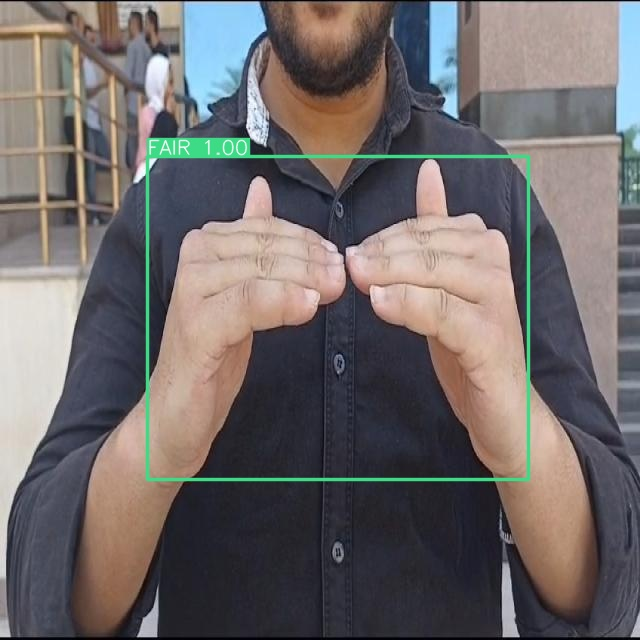

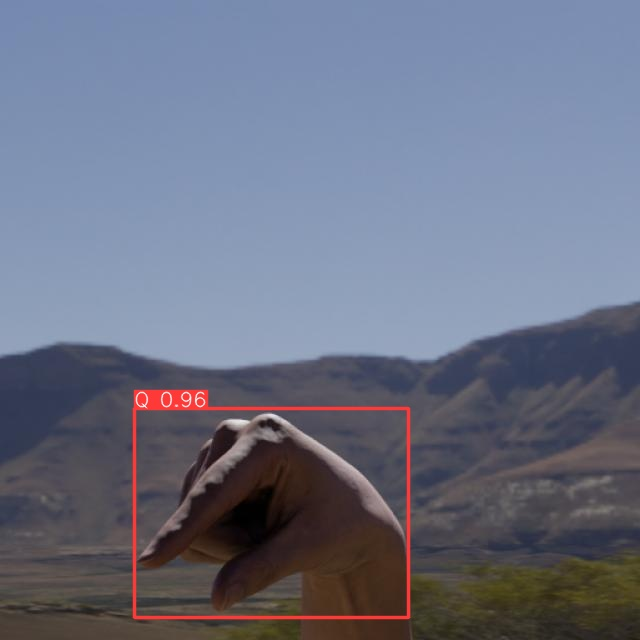

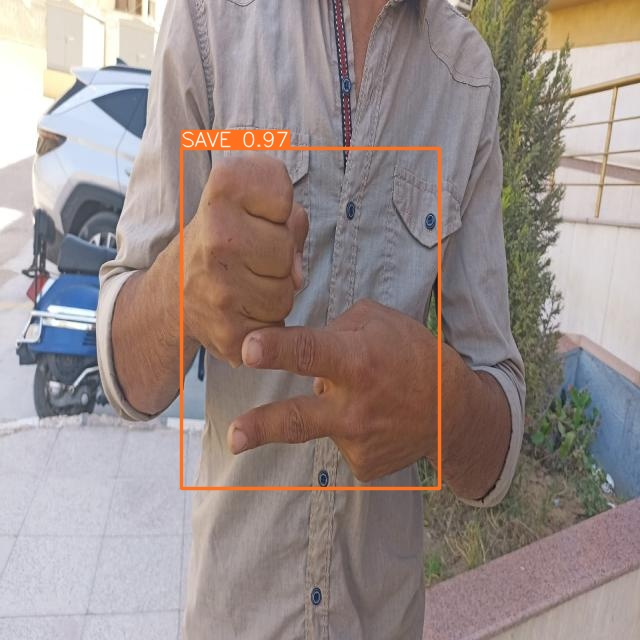

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[90]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [1]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

[Errno 2] No such file or directory: '{HOME}'
/content


NameError: name 'Image' is not defined

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)